Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
num_days_R_prediction=21

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

### Load Data from Github - John Hopkins Institute 

In [4]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [5]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
234                               NaN              Mozambique -18.665695   
235                               NaN                   Syria  34.802075   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                         Recovered                  Canada   0.000000   
239                               NaN                    Laos  19.856270   
240                               NaN                   Libya  26.335100   
241                               NaN      West Bank and Gaza  31.952200   
242                               NaN           Guinea-Bissau  11.803700   
243                               NaN                    Mali  17.570692   
244                               NaN   Saint Kitts and Nevis  17.357822   
245             Northwest Territories                  Canada  64.825500   
246                             Yukon                  Canada  64.282300   
247                               NaN                  Kosovo  42.602636   
248                               NaN                   Burma  21.916200   
249                          Anguilla          United Kingdom  18.220600   
250            British Virgin Islands          United Kingdom  18.420700   
251          Turks and Caicos Islands          United Kingdom  21.694000   
252                               NaN              MS Zaandam   0.000000   
253                               NaN                Botswana -22.328500   
254                               NaN                 Burundi  -3.37310

## Get Population

In [6]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [7]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN              Mozambique -18.665695   
237                               NaN                   Syria  34.802075   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                         Recovered                  Canada   0.000000   
241                               NaN                    Laos  19.856270   
242                               NaN                   Libya  26.335100   
243                               NaN      West Bank and Gaza  31.952200   
244                               NaN           Guinea-Bissau  11.803700   
245                               NaN                    Mali  17.570692   
246                               NaN   Saint Kitts and Nevis  17.357822   
247             Northwest Territories                  Canada  64.825500   
248                             Yukon                  Canada  64.282300   
249                               NaN                  Kosovo  42.602636   
250                               NaN                   Burma  21.916200   
251                          Anguilla          United Kingdom  18.220600   
252            British Virgin Islands          United Kingdom  18.420700   
253          Turks and Caicos Islands          United Kingdom  21.694000   
254                               NaN              MS Zaandam   0.000000   
255                               NaN                Botswana -22.328500   
256                               NaN                 Burundi  -3.37310

In [8]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/14/20  \
185        0        0        0        0        0        0  ...      263   
186        0        0        0        0        0        0  ...      567   
187        0        0        0        0        0        0  ...        7   
188        0        0        0        0        0        0  ...      351   
189        0        0        0        0        0        0  ...      170   
190        0        0        0        0        0        0  ...        0   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       36   
194        0        0        0        0        0        0  ...       73   

     4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  \
185      286      314      332      347      360      380      401   
186      599      629      657      687      714      735      762   
187        7        7        7        8        8        9        9   
188      372      392      411      421      451      478      498   
189      198      232      273      313      361      405      456   
190        0        0        0        0        0        0        0   
191        0        0        0        0        0        0        0   
192        0        0        0        0        0        0        0   
193       36       38       39       39       39       39       40   
194       79       83       87       92       97      103      109   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 97 columns]

In [9]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/14/20  4/15/20  4/16/20  \
175        0        0        0        0  ...      130      131      176   
176        0        0        0        0  ...     1378     1446     1645   
177        0        0        0        0  ...       61       72       75   
178        0        0        0        0  ...        0        0        0   
179        0        0        0        0  ...       22       23       30   
180        0        0        0        0  ...     2869     3108     6120   
181        0        0        0        0  ...      295      353      435   
182        0        0        0        0  ...      618      668      774   
183        0        0        0        0  ...      347      383      493   
184        0        0        0        0  ...      373      406      415   

     4/17/20  4/18/20  4/19/20  4/20/20  4/21/20   Population   \
175      176      176      233      238      238     4,636,000   
176     1765     1832     1868     1970     2073   197,000,000   
177       98      122      140      165      204     4,299,739   
178        0        0        0        0        0           NaN   
179       30       35       41       46       53     7,111,652   
180     6541     6684     6811     6968     6982    32,870,710   
181      487      516      572      613      654   104,900,000   
182      866      981     1040     1133     1297    37,980,000   
183      519      610      610      610      917    10,290,000   
184      464      510      518      555      614     2,870,256   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 97 columns]

In [10]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/14/20  \
185        0        0        0        0        0        0  ...     7202   
186        0        0        0        0        0        0  ...    17448   
187        0        0        0        0        0        0  ...     3428   
188        0        0        0        0        0        0  ...     6879   
189        0        0        0        0        0        0  ...    21102   
190        0        0        0        0        0        0  ...      134   
191        0        0        0        0        0        0  ...       15   
192        0        0        0        0        0        0  ...       12   
193        0        0        0        0        0        0  ...      371   
194        0        0        0        0        0        0  ...     5369   

     4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  \
185     7582     7918     8379     8742     9287     9593     9856   
186    18091    18841    19022    19685    20206    20863    21379   
187     3711     4103     4663     5008     5448     6015     6533   
188     7216     7707     8067     8418     8746     8936     9242   
189    24490    27938    32008    36793    42853    47121    52763   
190      136      138      143      144      147      147      150   
191       15       15       15       15       15       15       15   
192       12       12       12       12       12       12       12   
193      372      426      435      455      461      462      476   
194     5862     6380     7142     8274     9362    10484    11631   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 97 columns]

In [11]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/14/20  4/15/20  4/16/20  \
220        0        0        0        0  ...       54       54       60   
221        0        0        0        0  ...      440      447      457   
222        0        0        0        0  ...      129      131      131   
223        0        0        0        0  ...      254      256      284   
224        0        0        0        0  ...       11       11       11   
225        0        0        0        0  ...    93873    98476   103093   
226        0        0        0        0  ...      483      492      502   
227        2        2        5        5  ...   607670   636350   667592   
228        0        0        0        0  ...     1165     1302     1349   
229        0        0        0        0  ...      189      197      204   

     4/17/20  4/18/20  4/19/20  4/20/20  4/21/20   Population   \
220       61       61       61       66       66           NaN   
221      470      484      488      488      496       173,519   
222      132      132      132      132      132        33,693   
223      291      297      298      300      307        84,939   
224       11       11       11       11       11         4,991   
225   108692   114217   120067   124743   129044    66,440,000   
226      502      508      517      535      535     3,471,150   
227   699706   732197   759086   784326   823786   327,200,000   
228     1405     1490     1565     1627     1678    33,363,556   
229      204      227      256      256      285           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 97 columns]

## Create Time Series + Plots

In [12]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [13]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [14]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

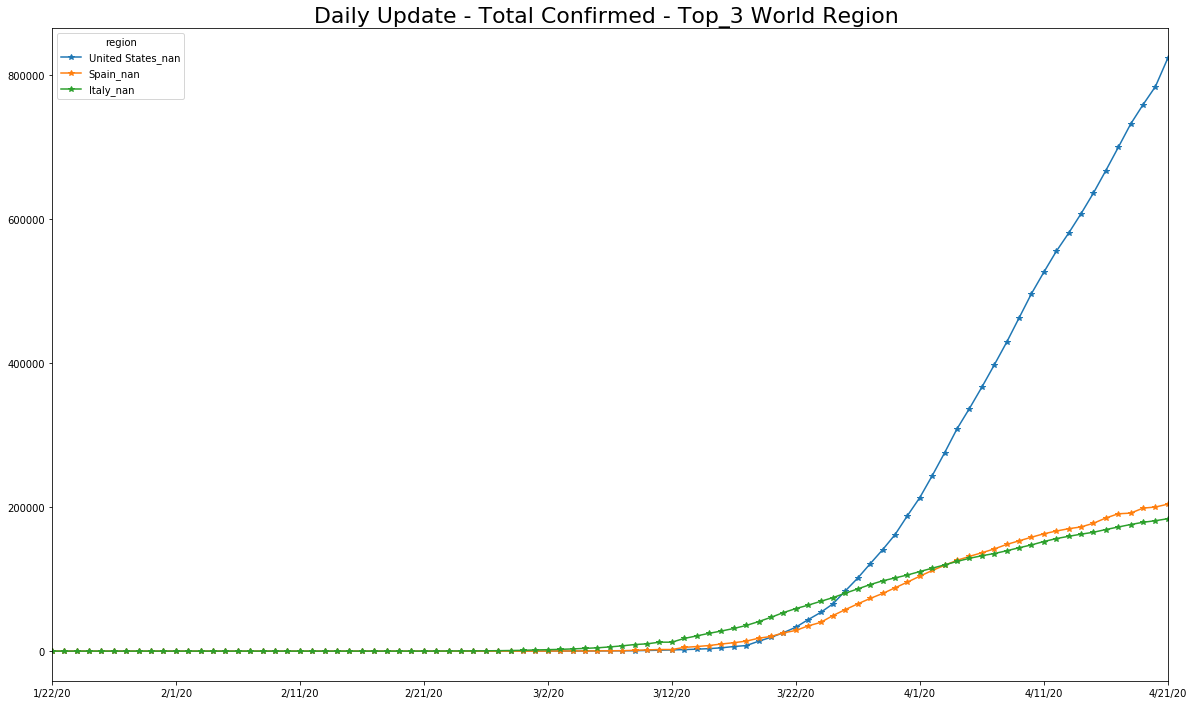

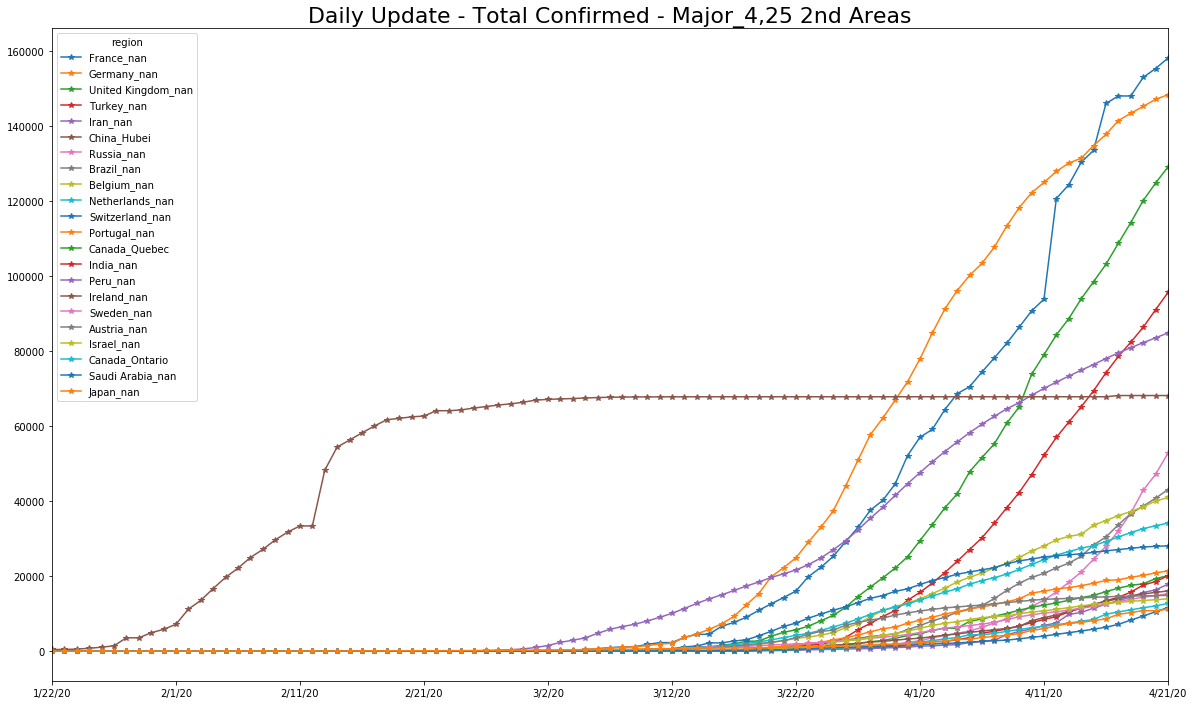

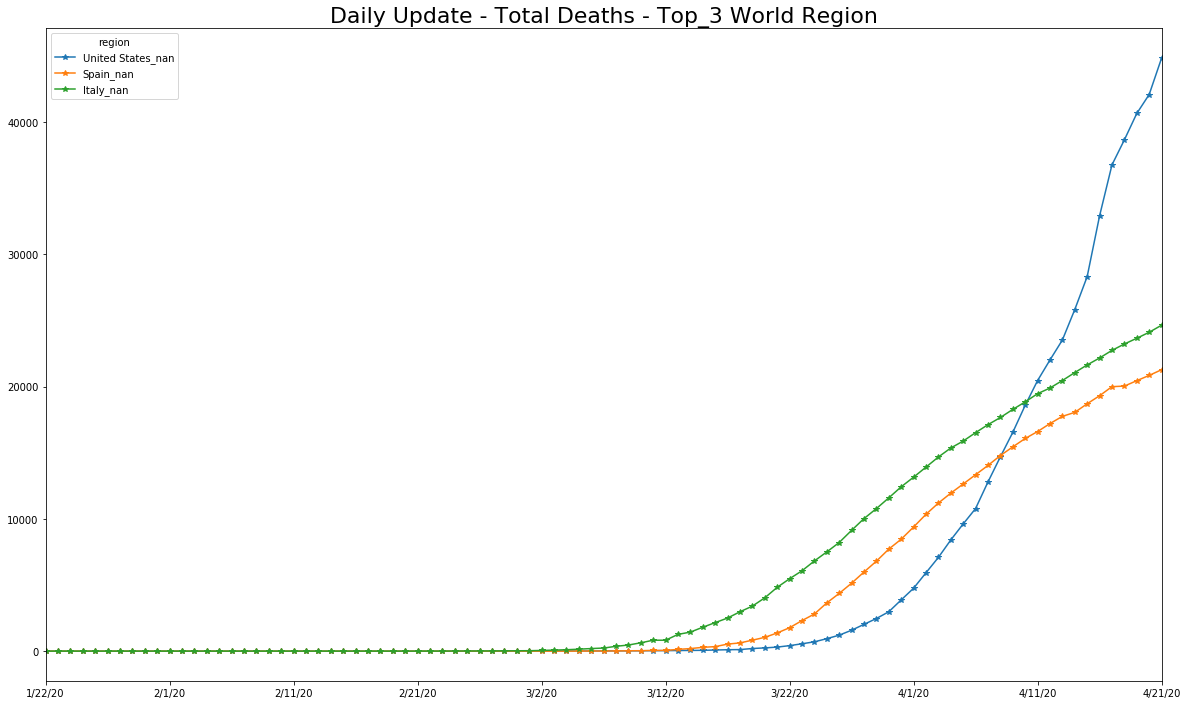

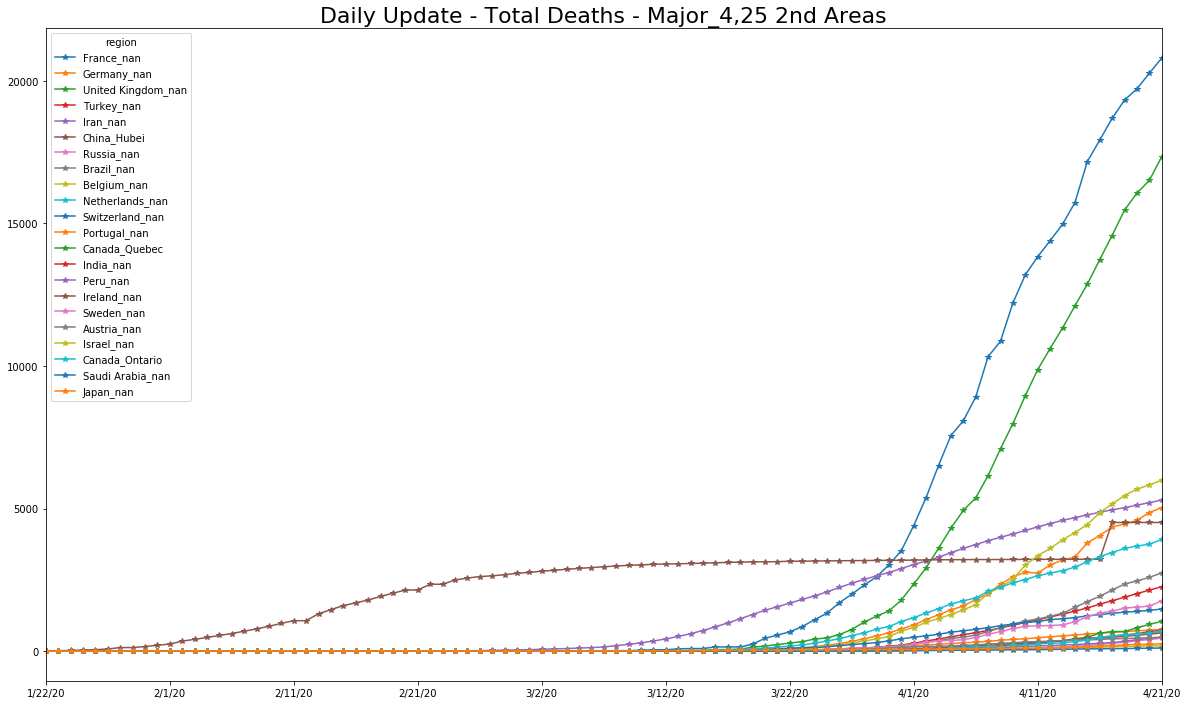

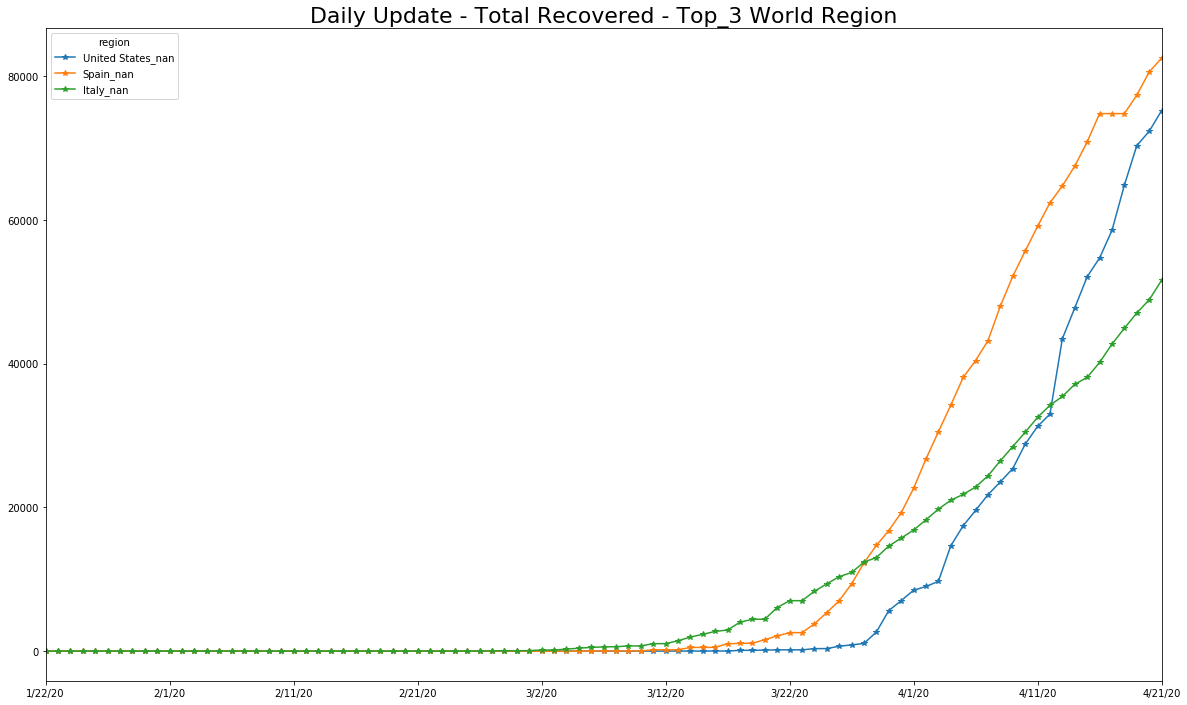

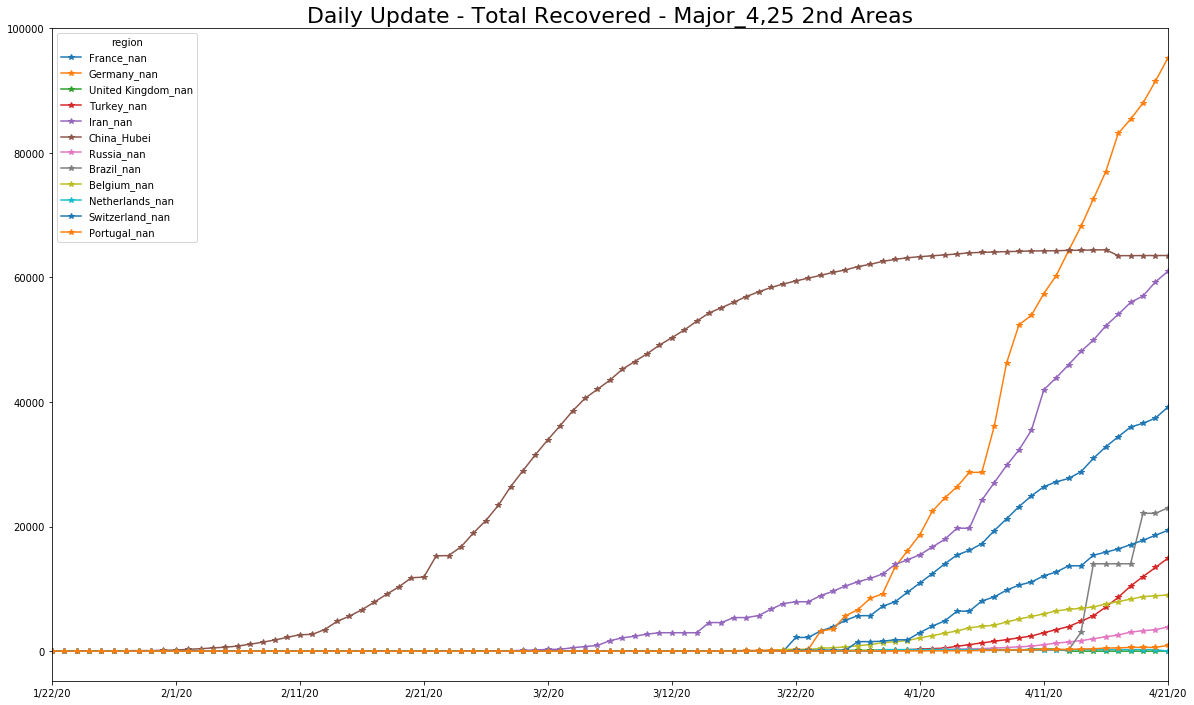

In [15]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [16]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [17]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [18]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
            continue
        if confirmed.iloc[i,vpos] in my_weather_fetch_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/04/22


In [19]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [20]:
w[:]

date                     region   min   max
0   2020/04/23  Australia_New South Wales  16.7  24.4
1   2020/04/23                Belgium_nan   9.4  21.7
2   2020/04/23                 Brazil_nan  17.8  21.7
3   2020/04/23             Canada_Ontario -19.2 -10.8
4   2020/04/23              Canada_Quebec  -8.0  -5.0
5   2020/04/23              China_Beijing   7.0  16.0
6   2020/04/23            China_Guangdong  17.0  26.0
7   2020/04/23            China_Hong Kong  17.5  21.9
8   2020/04/23                China_Hubei  13.0  21.0
9   2020/04/23                China_Macau  22.0  26.0
10  2020/04/23             China_Shanghai  12.4  20.0
11  2020/04/23                Finland_nan  -1.7   7.8
12  2020/04/23                 France_nan  10.2  17.5
13  2020/04/23                Germany_nan   7.7  17.0
14  2020/04/23                  India_nan  25.0  39.0
15  2020/04/23                   Iran_nan   9.0  18.0
16  2020/04/23                  Italy_nan   9.4  11.4
17  2020/04/23                  Japan_nan   0.7  11.3
18  2020/04/23           Korea, South_nan   3.0  10.0
19  2020/04/23               Malaysia_nan  23.3  34.0
20  2020/04/23            Netherlands_nan  13.3  22.8
21  2020/04/23                 Norway_nan   1.1   6.1
22  2020/04/23            Philippines_nan  27.2  31.7
23  2020/04/23                 Poland_nan   2.8  16.7
24  2020/04/23               Portugal_nan  11.7  17.3
25  2020/04/23                 Russia_nan  -1.0  25.0
26  2020/04/23              Singapore_nan  27.5  34.5
27  2020/04/23                  Spain_nan   9.7  18.8
28  2020/04/23                 Sweden_nan  -0.6  15.6
29  2020/04/23            Switzerland_nan   6.0  15.3
30  2020/04/23                Taiwan*_nan  16.0  20.0
31  2020/04/23                 Turkey_nan   9.6  15.3
32  2020/04/23         United Kingdom_nan   3.9  11.7
33  2020/04/23          United States_nan  13.3  15.7
34  2020/04/23                Vietnam_nan  26.0  31.0

## Kalman Filter With R

In [21]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 20/02 as
### they are too in the Past and model no longuer trains in China Hubei

#ts=ts[29:]
#ts_d=ts_d[29:]
#ts_rec=ts_rec[29:]

In [22]:
ts[-4:-1]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
4/18/20              933          548         2534          704          24   
4/19/20              996          562         2629          713          24   
4/20/20             1026          584         2718          717          24   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
4/18/20                       23           2758         1248   
4/19/20                       23           2839         1291   
4/20/20                       23           2941         1339   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
4/18/20                                     103                       2926   
4/19/20                                     103                       2926   
4/20/20                                     103                       2926   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
4/18/20  ...             732197          508            1490            227   
4/19/20  ...             759086          517            1565            256   
4/20/20  ...             784326          535            1627            256   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
4/18/20          268                     418                   6          1   
4/19/20          268                     437                   6          1   
4/20/20          268                     449                   6          1   

region   Zambia_nan  Zimbabwe_nan  
4/18/20          57            25  
4/19/20          61            25  
4/20/20          65            25  

[3 rows x 264 columns]

In [23]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [24]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [25]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [26]:
p=%R pred_all

In [27]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [28]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [29]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [30]:
w_in_model=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [31]:
w_in_model.tail(2)

date       region   min   max
6269 2020-04-22  Vietnam_nan  25.2  32.0
6270 2020-04-23  Vietnam_nan  26.0  31.0

### Build Train Set Data Structure

In [32]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [33]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10)
#
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [34]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
34    2020-02-25  Afghanistan_nan          1             1             1   
35    2020-02-26  Afghanistan_nan          1             0             1   
36    2020-02-27  Afghanistan_nan          1             0             1   
37    2020-02-28  Afghanistan_nan          1             0             0   
38    2020-02-29  Afghanistan_nan          1             0             0   
39    2020-03-01  Afghanistan_nan          1             0             0   
40    2020-03-02  Afghanistan_nan          1             0             0   
41    2020-03-03  Afghanistan_nan          1             0             0   
42    2020-03-04  Afghanistan_nan          1             0             0   
43    2020-03-05  Afghanistan_nan          1             0             0   
44    2020-03-06  Afghanistan_nan          1             0             0   
45    2020-03-07  Afghanistan_nan          1             0             0   
46    2020-03-08  Afghanistan_nan          4             0             0   
47    2020-03-09  Afghanistan_nan          4             3             3   
48    2020-03-10  Afghanistan_nan          5             0             3   
49    2020-03-11  Afghanistan_nan          7             1             4   
50    2020-03-12  Afghanistan_nan          7             2             3   
51    2020-03-13  Afghanistan_nan          7             0             3   
52    2020-03-14  Afghanistan_nan         11             0             2   
53    2020-03-15  Afghanistan_nan         16             4             4   
54    2020-03-16  Afghanistan_nan         21             5             9   
55    2020-03-17  Afghanistan_nan         22             5            14   
56    2020-03-18  Afghanistan_nan         22             1            11   
57    2020-03-19  Afghanistan_nan         22             0             6   
58    2020-03-20  Afghanistan_nan         24             0             1   
59    2020-03-21  Afghanistan_nan         24             2             2   
60    2020-03-22  Afghanistan_nan         40             0             2   
61    2020-03-23  Afghanistan_nan         40            16            18   
62    2020-03-24  Afghanistan_nan         74             0            16   
63    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
24442 2020-03-24     Zimbabwe_nan          3             0             2   
24443 2020-03-25     Zimbabwe_nan          3             0             0   
24444 2020-03-26     Zimbabwe_nan          3             0             0   
24445 2020-03-27     Zimbabwe_nan          5             0             0   
24446 2020-03-28     Zimbabwe_nan          7             2             2   
24447 2020-03-29     Zimbabwe_nan          7             2             4   
24448 2020-03-30     Zimbabwe_nan          7             0             4   
24449 2020-03-31     Zimbabwe_nan          8             0             2   
24450 2020-04-01     Zimbabwe_nan          8             1             1   
24451 2020-04-02     Zimbabwe_nan          9             0             1   
24452 2020-04-03     Zimbabwe_nan          9             1             2   
24453 2020-04-04     Zimbabwe_nan          9             0             1   
24454 2020-04-05     Zimbabwe_nan          9             0             1   
24455 2020-04-06     Zimbabwe_nan         10             0             0   
24456 2020-04-07     Zimbabwe_nan         11             1             1   
24457 2020-04-08     Zimbabwe_nan         11             1             2   
24458 2020-04-09     Zimbabwe_nan         11             0             2   
24459 2020-04-10     Zimbabwe_nan         13             0             1   
24460 2020-04-11     Zimbabwe_nan         14             2             2   
24461 2020-04-12     Zimbabwe_nan         14             1             3   
24462 2020-04-13     Zimbabwe_nan         17             0  

In [35]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [36]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]

date           region  confirmed  1_day_change  3_day_change  \
0     2020-01-22  Afghanistan_nan          0             0             0   
1     2020-01-23  Afghanistan_nan          0             0             0   
2     2020-01-24  Afghanistan_nan          0             0             0   
3     2020-01-25  Afghanistan_nan          0             0             0   
4     2020-01-26  Afghanistan_nan          0             0             0   
5     2020-01-27  Afghanistan_nan          0             0             0   
6     2020-01-28  Afghanistan_nan          0             0             0   
7     2020-01-29  Afghanistan_nan          0             0             0   
8     2020-01-30  Afghanistan_nan          0             0             0   
9     2020-01-31  Afghanistan_nan          0             0             0   
10    2020-02-01  Afghanistan_nan          0             0             0   
11    2020-02-02  Afghanistan_nan          0             0             0   
12    2020-02-03  Afghanistan_nan          0             0             0   
13    2020-02-04  Afghanistan_nan          0             0             0   
14    2020-02-05  Afghanistan_nan          0             0             0   
15    2020-02-06  Afghanistan_nan          0             0             0   
16    2020-02-07  Afghanistan_nan          0             0             0   
17    2020-02-08  Afghanistan_nan          0             0             0   
18    2020-02-09  Afghanistan_nan          0             0             0   
19    2020-02-10  Afghanistan_nan          0             0             0   
20    2020-02-11  Afghanistan_nan          0             0             0   
21    2020-02-12  Afghanistan_nan          0             0             0   
22    2020-02-13  Afghanistan_nan          0             0             0   
23    2020-02-14  Afghanistan_nan          0             0             0   
24    2020-02-15  Afghanistan_nan          0             0             0   
25    2020-02-16  Afghanistan_nan          0             0             0   
26    2020-02-17  Afghanistan_nan          0             0             0   
92    2020-01-22      Albania_nan          0             0             0   
93    2020-01-23      Albania_nan          0             0             0   
94    2020-01-24      Albania_nan          0             0             0   
...          ...              ...        ...           ...           ...   
24442 2020-03-24     Zimbabwe_nan          3             0             2   
24443 2020-03-25     Zimbabwe_nan          3             0             0   
24444 2020-03-26     Zimbabwe_nan          3             0             0   
24445 2020-03-27     Zimbabwe_nan          5             0             0   
24446 2020-03-28     Zimbabwe_nan          7             2             2   
24447 2020-03-29     Zimbabwe_nan          7             2             4   
24448 2020-03-30     Zimbabwe_nan          7             0             4   
24449 2020-03-31     Zimbabwe_nan          8             0             2   
24450 2020-04-01     Zimbabwe_nan          8             1             1   
24451 2020-04-02     Zimbabwe_nan          9             0             1   
24452 2020-04-03     Zimbabwe_nan          9             1             2   
24453 2020-04-04     Zimbabwe_nan          9             0             1   
24454 2020-04-05     Zimbabwe_nan          9             0             1   
24455 2020-04-06     Zimbabwe_nan         10             0             0   
24456 2020-04-07     Zimbabwe_nan         11             1             1   
24457 2020-04-08     Zimbabwe_nan         11             1             2   
24458 2020-04-09     Zimbabwe_nan         11             0             2   
24459 2020-04-10     Zimbabwe_nan         13             0             1   
24460 2020-04-11     Zimbabwe_nan         14             2             2   
24461 2020-04-12     Zimbabwe_nan         14             1             3   
24462 2020-04-13     Zimbabwe_nan         17             0  

In [37]:
train.to_csv(r'data/train.csv', index = False, header=True)

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse           mae
254  United States_nan  7.968563e+09  89266.806389  12243.835165


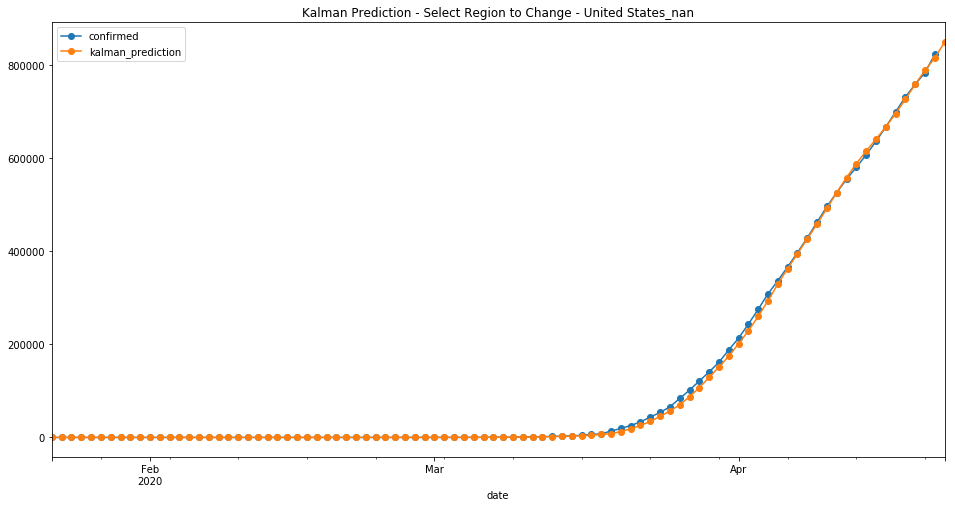

In [38]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [39]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3ejrcfsb
  JVM stdout: /tmp/tmp3ejrcfsb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3ejrcfsb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 5 months and 26 days !!!
H2O cluster name:           H2O_from_python_unknownUser_v5fe5l
H2O cluster total nodes:    1
H2O cluster free memory:    3 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [40]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-45)).strftime('%Y-%m-%d')
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-03-08
last_train_date= 2020-04-21
first_bootstrap_date= 2020-04-13
boost_bootstrap_date= 2020-04-18
first_test_date= 2020-04-12
last_test_date= 2020-04-22
first_valid_date= 2020-04-20


In [41]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          ]

In [42]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [43]:
pred2.iloc[175:195]

0  confirmed       date          region
175  1390.0       1373 2020-04-18  Azerbaijan_nan
176  1411.0       1398 2020-04-19  Azerbaijan_nan
177  1433.0       1436 2020-04-20  Azerbaijan_nan
178  1457.0       1480 2020-04-21  Azerbaijan_nan
179  1502.0          0 2020-04-22  Azerbaijan_nan
180    50.0         47 2020-04-13     Bahamas_nan
181    52.0         49 2020-04-14     Bahamas_nan
182    52.0         49 2020-04-15     Bahamas_nan
183    53.0         53 2020-04-16     Bahamas_nan
184    57.0         54 2020-04-17     Bahamas_nan
185    57.0         55 2020-04-18     Bahamas_nan
186    59.0         55 2020-04-19     Bahamas_nan
187    57.0         60 2020-04-20     Bahamas_nan
188    63.0         65 2020-04-21     Bahamas_nan
189    69.0          0 2020-04-22     Bahamas_nan
190  1216.0       1361 2020-04-13     Bahrain_nan
191  1517.0       1528 2020-04-14     Bahrain_nan
192  1698.0       1671 2020-04-15     Bahrain_nan
193  1872.0       1700 2020-04-16     Bahrain_nan
194  1832.0       1740 2020-04-17     Bahrain_nan

In [44]:
pred2.iloc[220:240]

0  confirmed       date       region
220   2989.0       2919 2020-04-13  Belarus_nan
221   3224.0       3281 2020-04-14  Belarus_nan
222   3629.0       3728 2020-04-15  Belarus_nan
223   4078.0       4204 2020-04-16  Belarus_nan
224   4627.0       4779 2020-04-17  Belarus_nan
225   5328.0       4779 2020-04-18  Belarus_nan
226   5166.0       4779 2020-04-19  Belarus_nan
227   5044.0       6264 2020-04-20  Belarus_nan
228   6657.0       6723 2020-04-21  Belarus_nan
229   7231.0          0 2020-04-22  Belarus_nan
230  31224.0      30589 2020-04-13  Belgium_nan
231  31757.0      31119 2020-04-14  Belgium_nan
232  32078.0      33573 2020-04-15  Belgium_nan
233  34574.0      34809 2020-04-16  Belgium_nan
234  35846.0      36138 2020-04-17  Belgium_nan
235  37900.0      37183 2020-04-18  Belgium_nan
236  38191.0      38496 2020-04-19  Belgium_nan
237  39662.0      39983 2020-04-20  Belgium_nan
238  40951.0      40956 2020-04-21  Belgium_nan
239  41731.0          0 2020-04-22  Belgium_nan

In [45]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)


training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [46]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data',model_v2.r2(valid=True))

# MSE on the training data =  81130.72648785062
# MSE on the validation data =  7236900616.690806
# R^2 on the training data =  0.9999952005301262
# R^2 on the validation data 0.4725205405455698


In [47]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1587557977764_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 81130.72648785062
RMSE: 284.83455985510363
MAE: 11.921480051656006
RMSLE: 0.07413920340574404
Mean Residual Deviance: 81130.72648785062

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 7236900616.690806
RMSE: 85069.97482479236
MAE: 21909.33976048553
RMSLE: 5.602178610138007
Mean Residual Deviance: 7236900616.690806
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse    validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  -----------------  ------------------  ---------------------
     2020-04-22 12:20:05  0.237 sec   0.0                nan                 nan                 nan                  nan                nan                 nan
     2020-04-22 12:20:06  0.929 sec   1.0                1419.8431795855502  23.150392179189613  2015954.6546156046   84829.99438074295  22053.045182872953  7196127946.636882
     2020-04-22 12:20:06  1.132 sec   2.0                1202.8135065086176  28.07906466096918   1446760.3314395563   85443.0874725238   21904.052178955077  7300521196.837354
     2020-04-22 12:20:06  1.312 sec   3.0                978.8474914352407   24.46201584462177   958142.4114890638    85250.65228595246  22466.584616234188  7267673715.18037
     2020-04-22 12:20:06  1.479 sec   4.0                650.4414856167165   19.877082223208383  423074.12621128117   84557.33326257861  22163.083068702334  7149942608.478783
---  ---                  ---         ---                ---                 ---                 ---                  ---                ---                 ---
     2020-04-22 12:20:25  20.299 sec  269.0              297.96228898142215  12.918572366469029  88781.5256550485     84856.65834982277  21882.42752042642   7200652466.298547
     2020-04-22 12:20:29  24.353 sec  331.0              290.8460596316902   12.349567251895788  84591.4304032807     84870.57691162237  21866.453329789554  7203014825.311608
     2020-04-22 12:20:33  28.379 sec  392.0              283.01990378360836  12.15791564644878   80100.26593768294    84962.62304577362  21864.0615891055    7218647314.818223
     2020-04-22 12:20:37  32.437 sec  452.0              280.6242784240725   11.871275129658938  78749.98564103135    85078.88974835156  21890.70746209021   7238417480.81216
     2020-04-22 12:20:41  35.818 sec  500.0              284.83455985510363  11.921480051656006  81130.72648785062    85069.97482479236  21909.33976048553   7236900616.690806


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  2.70964e+17            1                    0.318975
last_day           2.53013e+17            0.933752             0.297843
7_day_change       1.33475e+17            0.492593             0.157125
3_day_change       7.5662e+16             0.279233             0.0890682
1_day_change       5.93617e+16            0.219076             0.0698798
region             4.6033e+16             0.169886             0.0541894
infected_rate      8.56668e+15            0.0316156            0.0100846
min                1.65221e+15            0.00609754           0.00194496
3_day_change_rate  2.53308e+14            0.000934842          0.000298191
max                1.98394e+14            0.00073218           0.000233547
7_day_change_rate  1.61606e+14            0.000596413          0.000190241
1_day_change_rate  1.42817e+14            0.000527071          0.000168122

In [48]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         2.709638e+17           1.000000    0.318975
1            last_day         2.530129e+17           0.933752    0.297843
2        7_day_change         1.334748e+17           0.492593    0.157125
3        3_day_change         7.566197e+16           0.279233    0.089068
4        1_day_change         5.936173e+16           0.219076    0.069880
5              region         4.603299e+16           0.169886    0.054189
6       infected_rate         8.566677e+15           0.031616    0.010085
7                 min         1.652214e+15           0.006098    0.001945
8   3_day_change_rate         2.533084e+14           0.000935    0.000298
9                 max         1.983943e+14           0.000732    0.000234
10  7_day_change_rate         1.616064e+14           0.000596    0.000190
11  1_day_change_rate         1.428171e+14           0.000527    0.000168

In [49]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


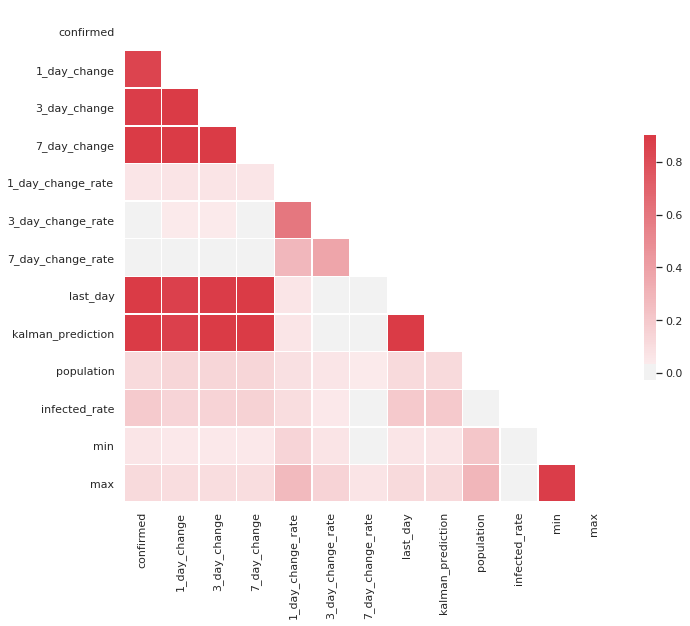

In [50]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [51]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.844496
3_day_change         0.881783
7_day_change         0.906590
1_day_change_rate    0.062005
3_day_change_rate    0.027748
7_day_change_rate    0.005851
last_day             0.950840
kalman_prediction    0.952443
population           0.116785
infected_rate        0.194546
min                  0.057953
max                  0.113841
Name: confirmed, dtype: float64


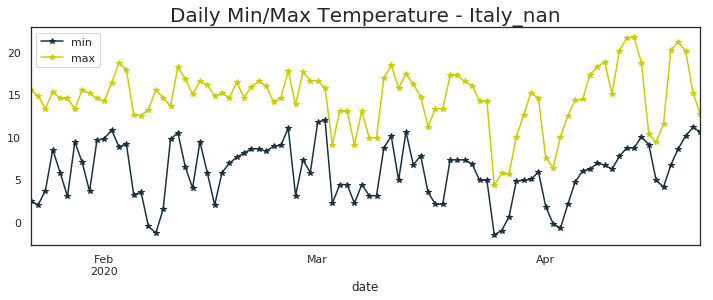

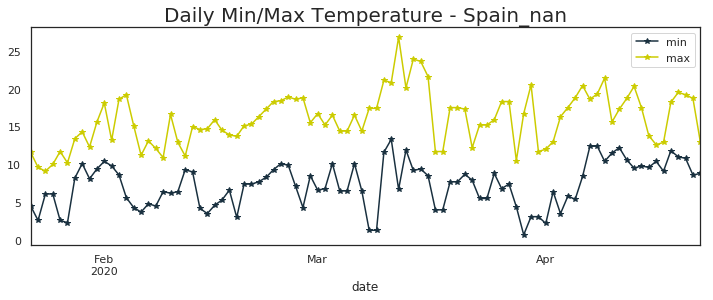

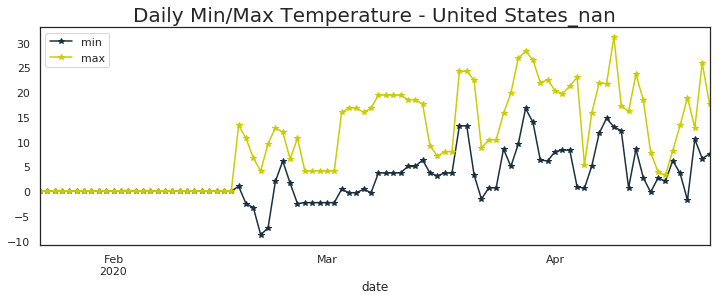

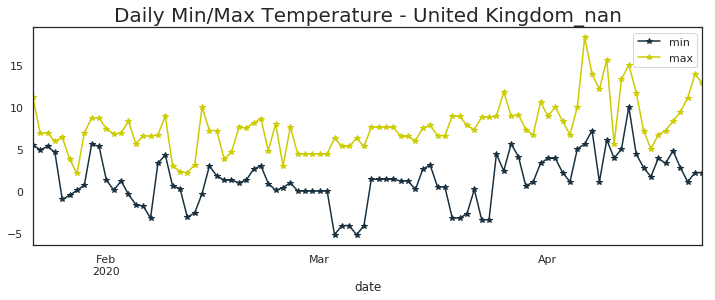

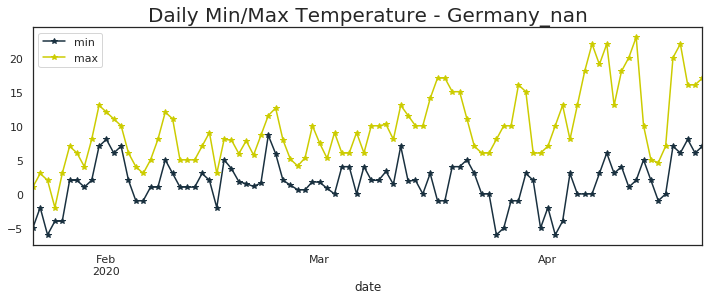

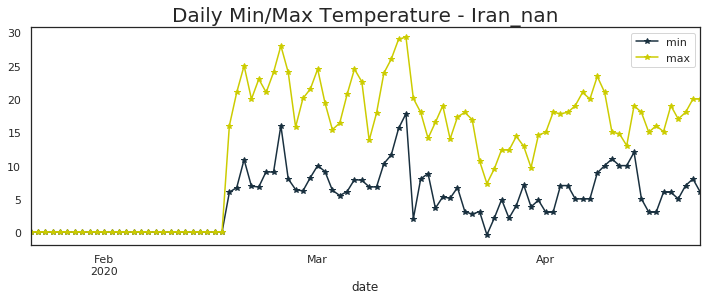

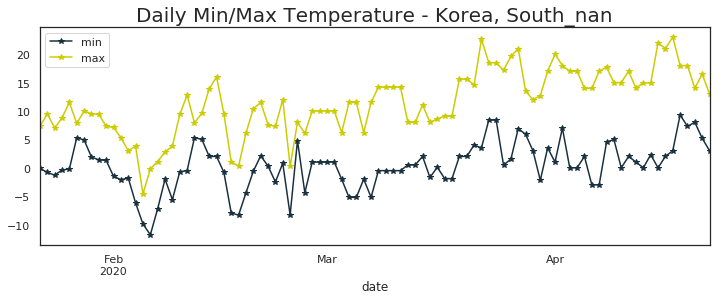

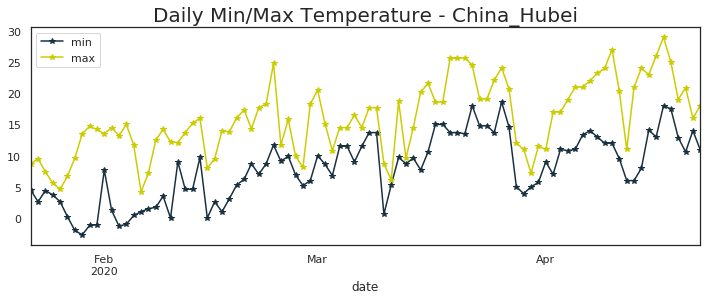

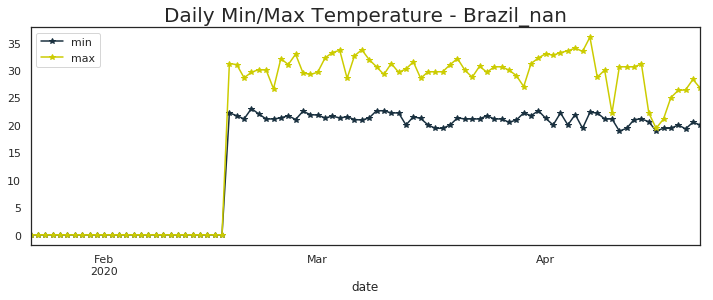

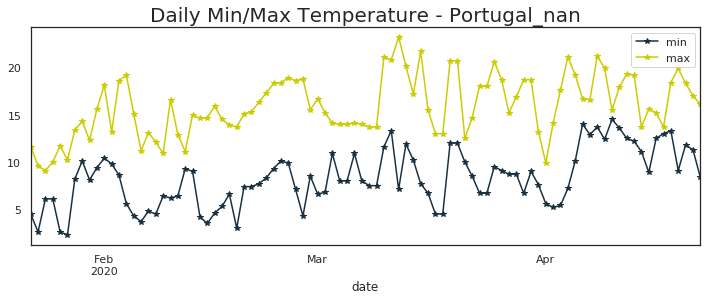

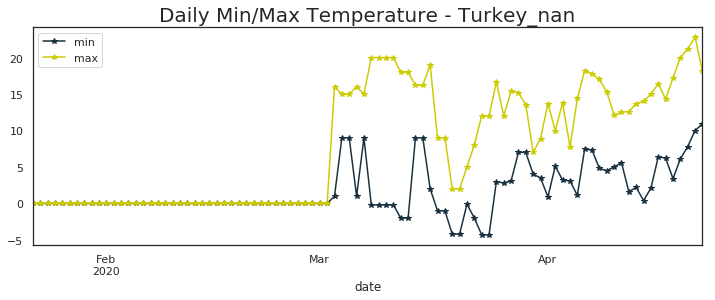

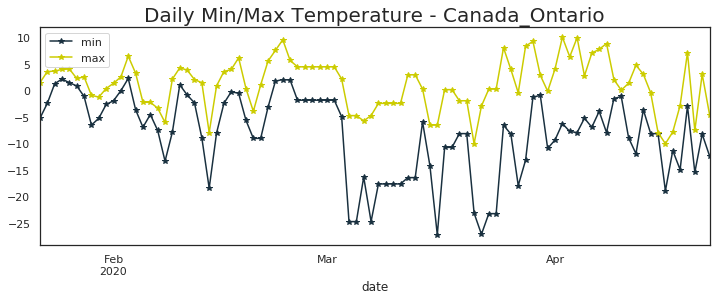

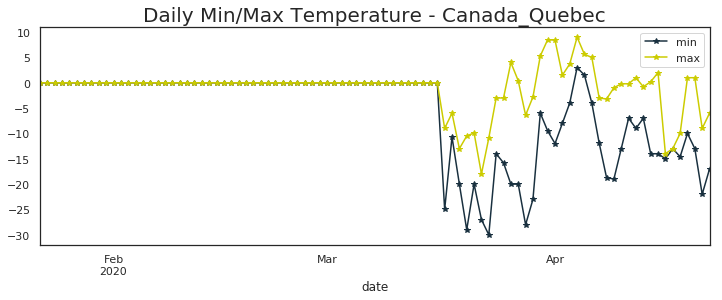

In [52]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [53]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           16.7  31.1
Spain_nan                   13.3  26.8
Italy_nan                   12.0  21.7
France_nan                  13.0  23.0
Germany_nan                  8.6  23.0
United Kingdom_nan          10.0  18.3
Turkey_nan                  10.9  22.8
Iran_nan                    17.8  29.3
China_Hubei                 18.6  29.0
Russia_nan                   5.0  20.0
Brazil_nan                  23.0  36.0
Belgium_nan                 17.8  26.1
Netherlands_nan             12.8  26.1
Switzerland_nan             11.2  19.7
Portugal_nan                14.5  23.2
Canada_Quebec                3.0   9.0
India_nan                   28.0  42.0
Peru_nan                     0.0   0.0
Ireland_nan                  0.0   0.0
Sweden_nan                   6.1  18.9
Austria_nan                  2.6  11.7
Israel_nan                  12.9  24.7
Canada_Ontario              

### Kalman X Days Ahead Prediction

In [54]:
%%R

#install.packages('reshape')

NULL


In [55]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [56]:
all_new=%R all_new

In [57]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

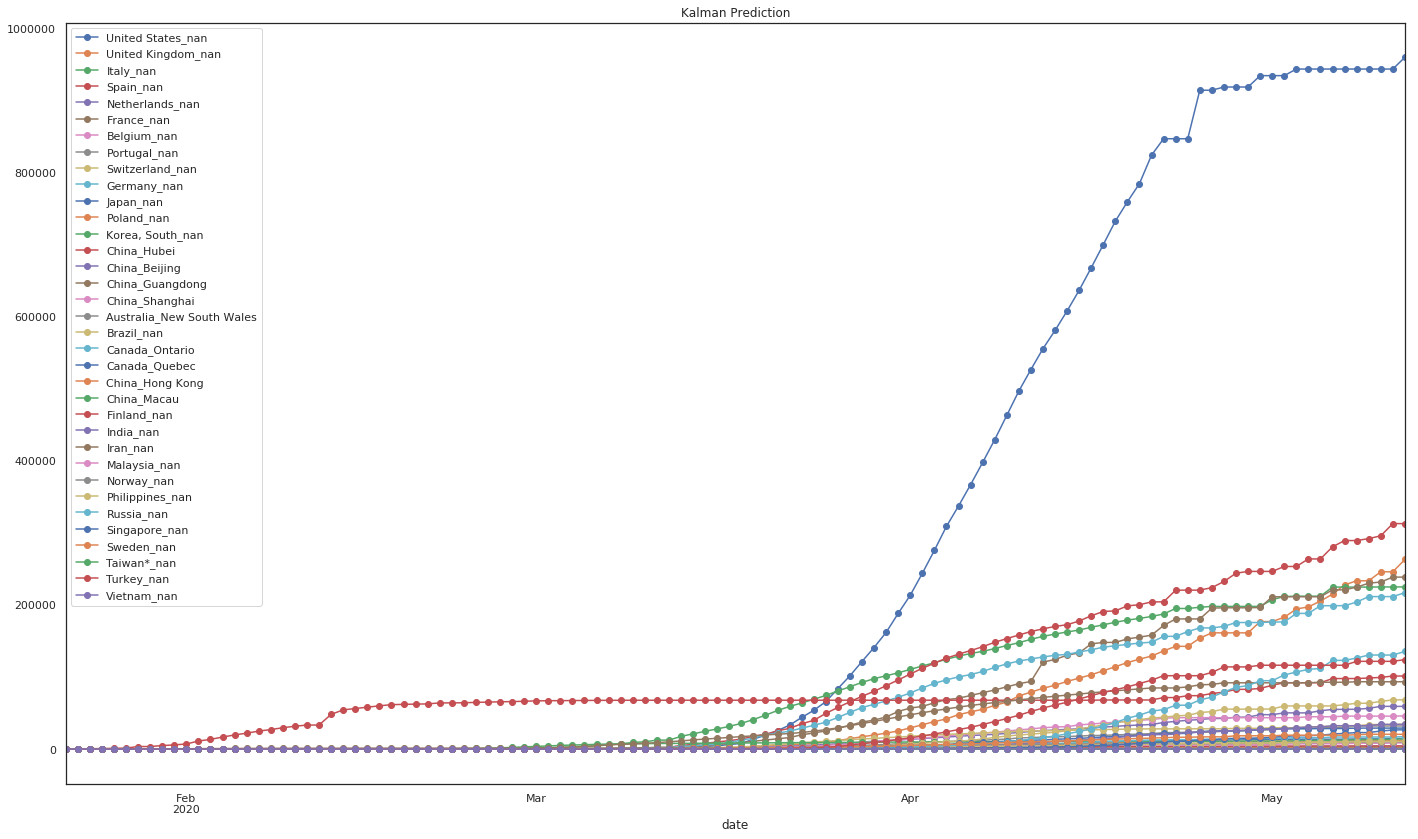

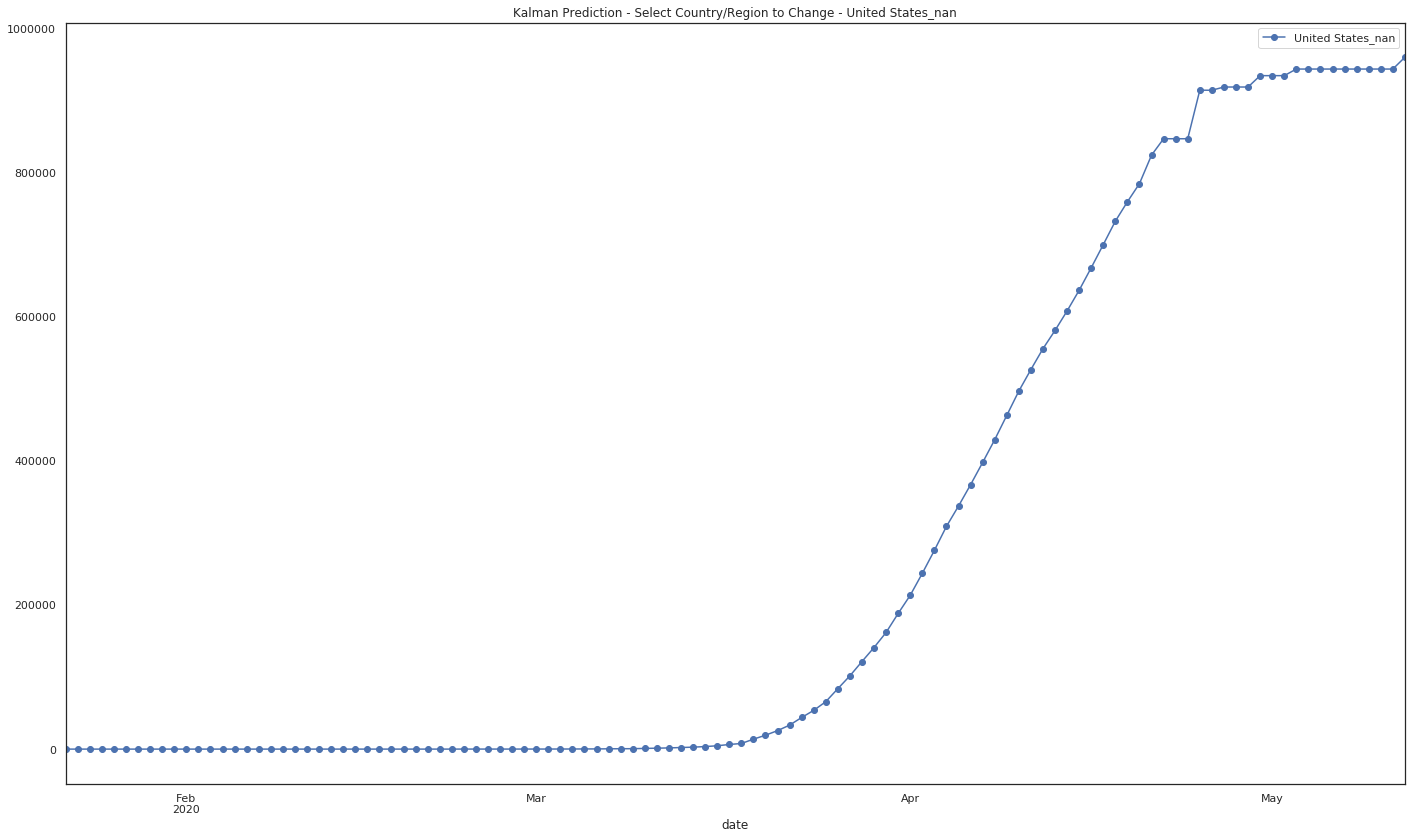

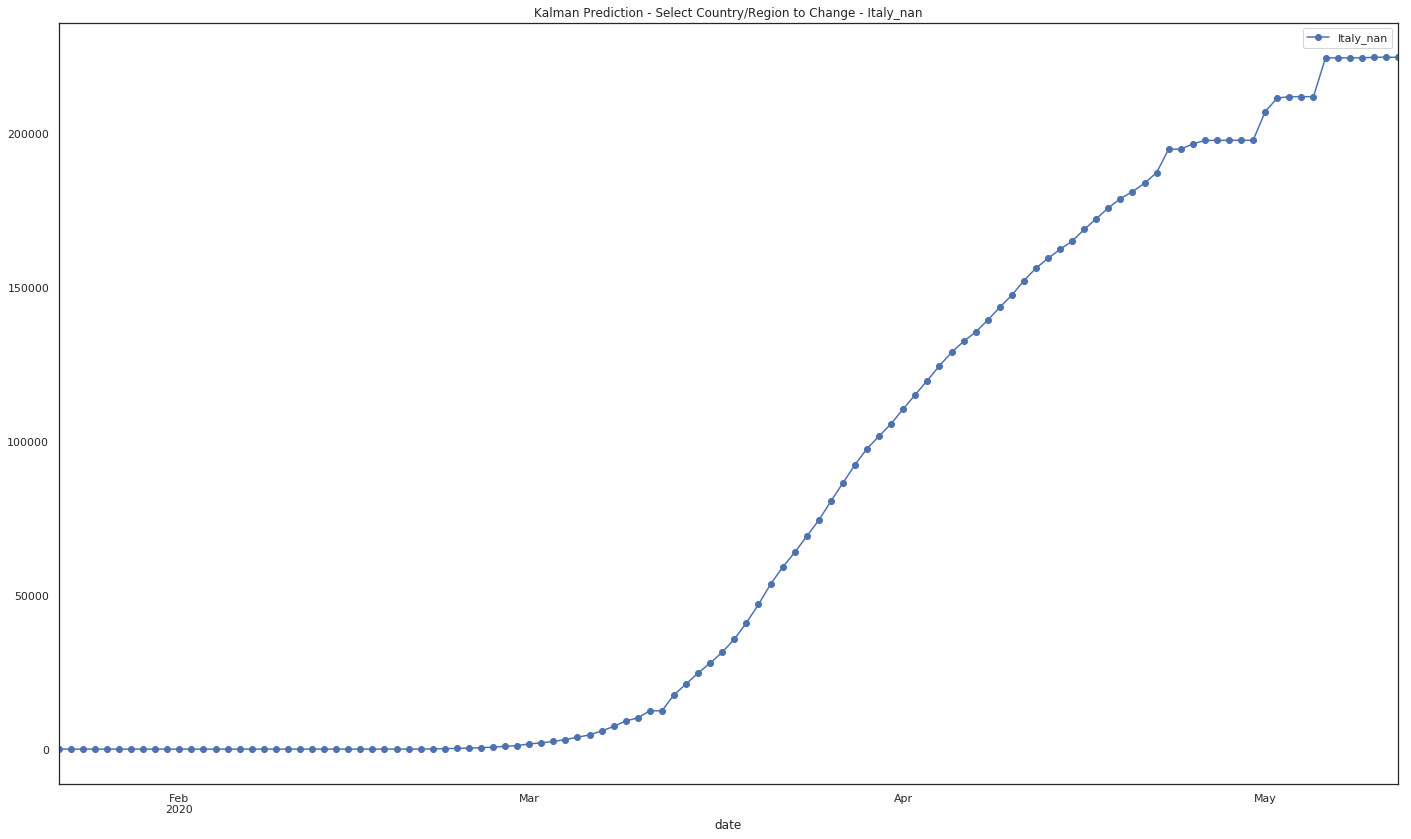

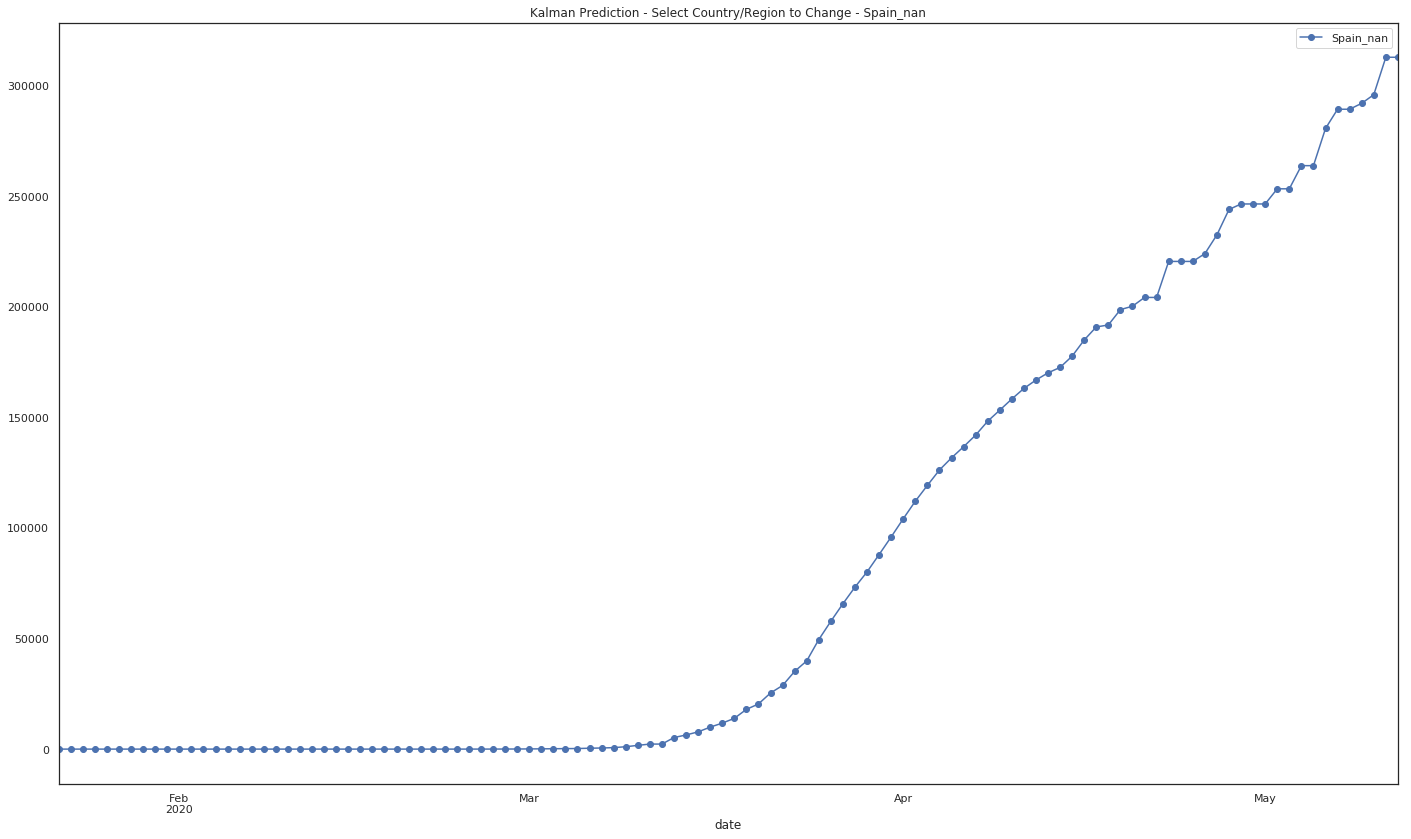

In [58]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


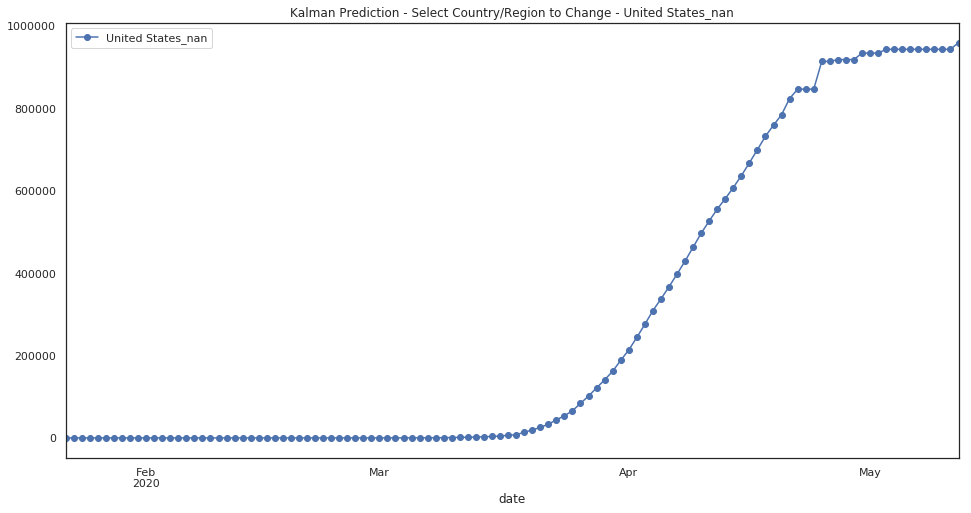

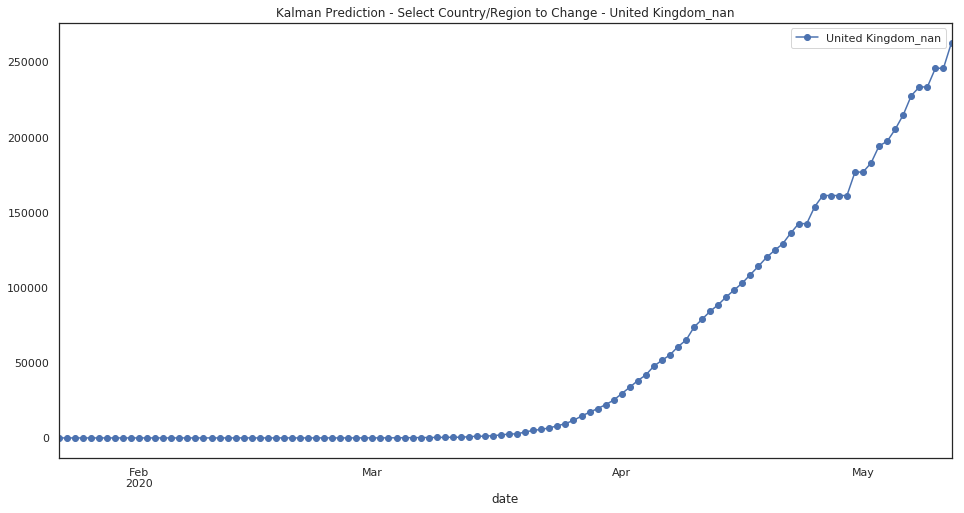

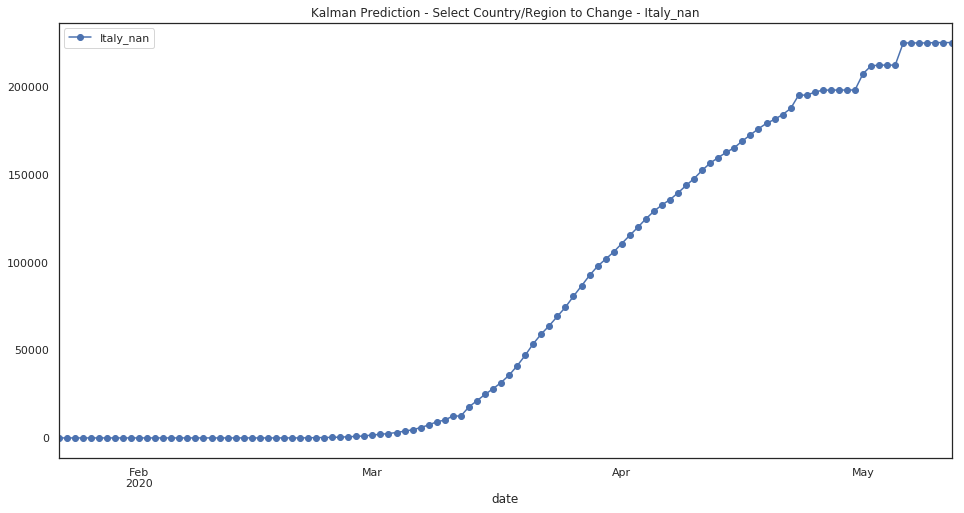

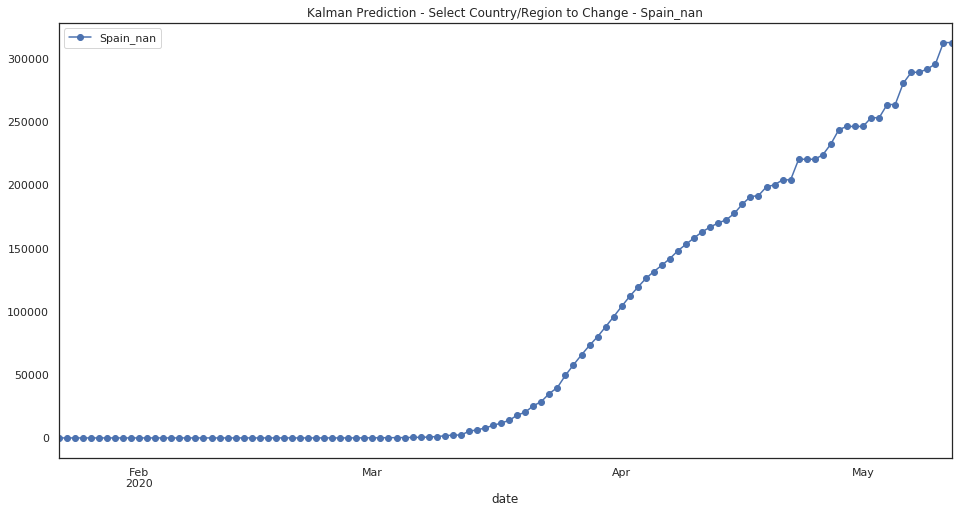

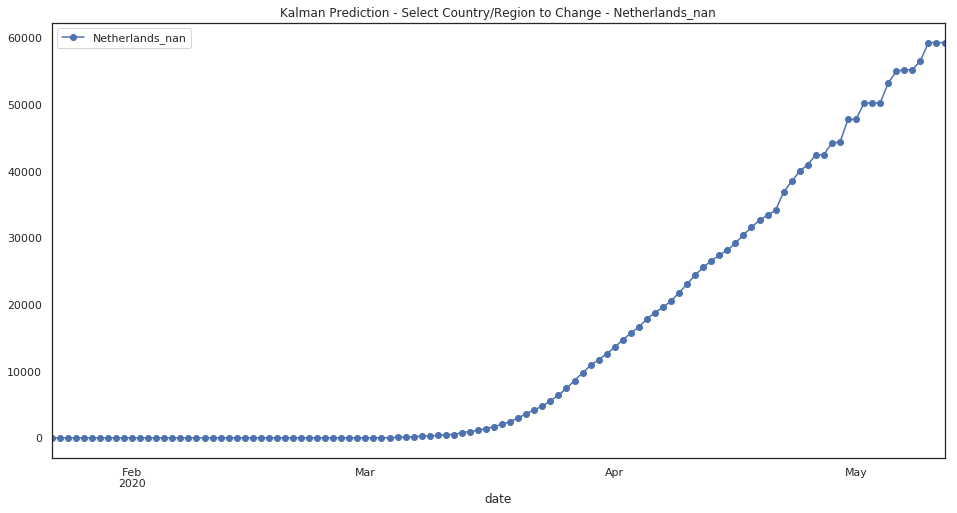

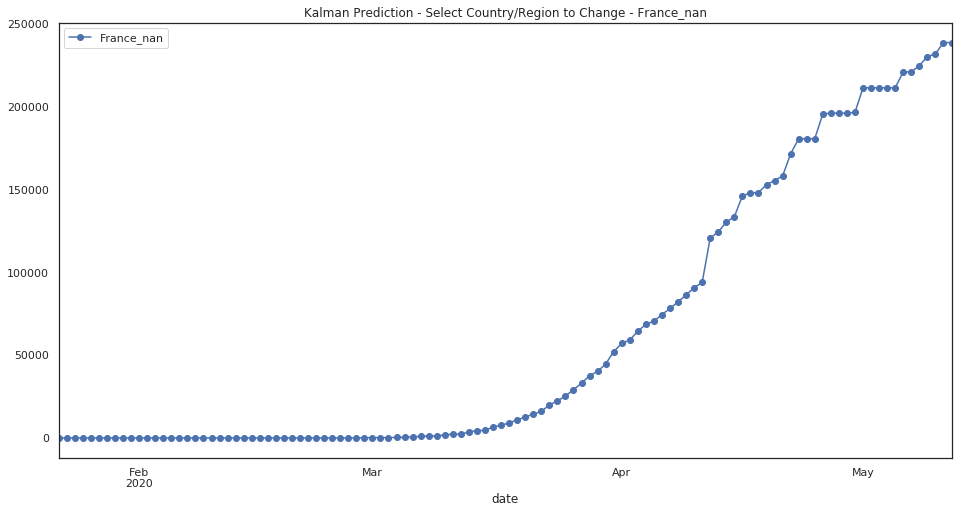

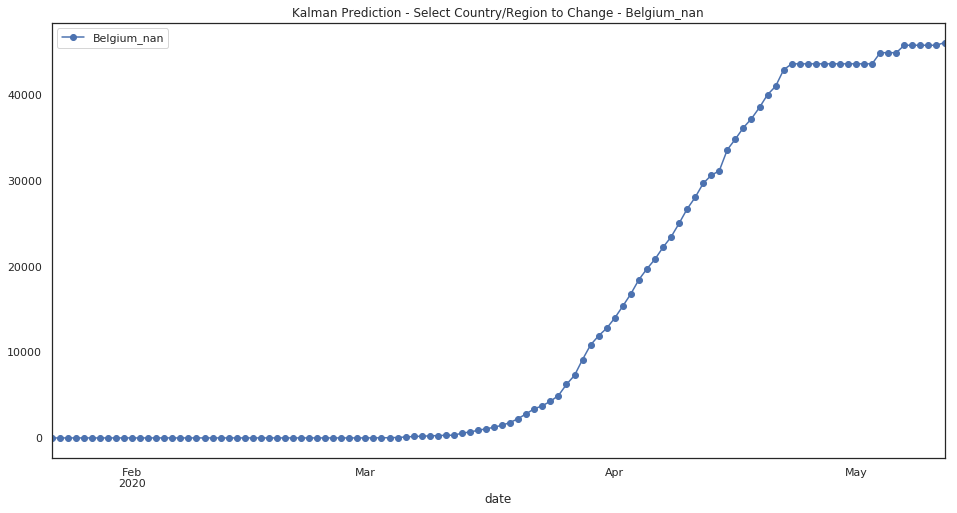

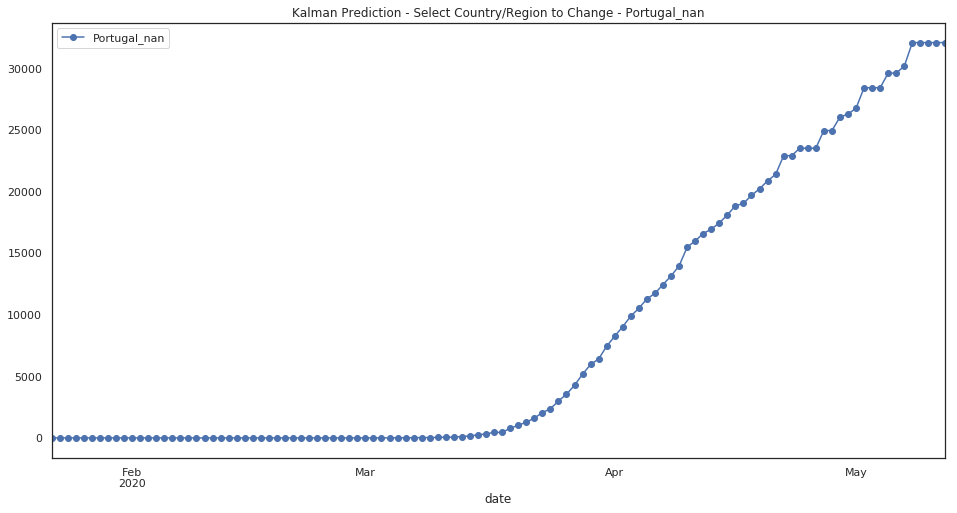

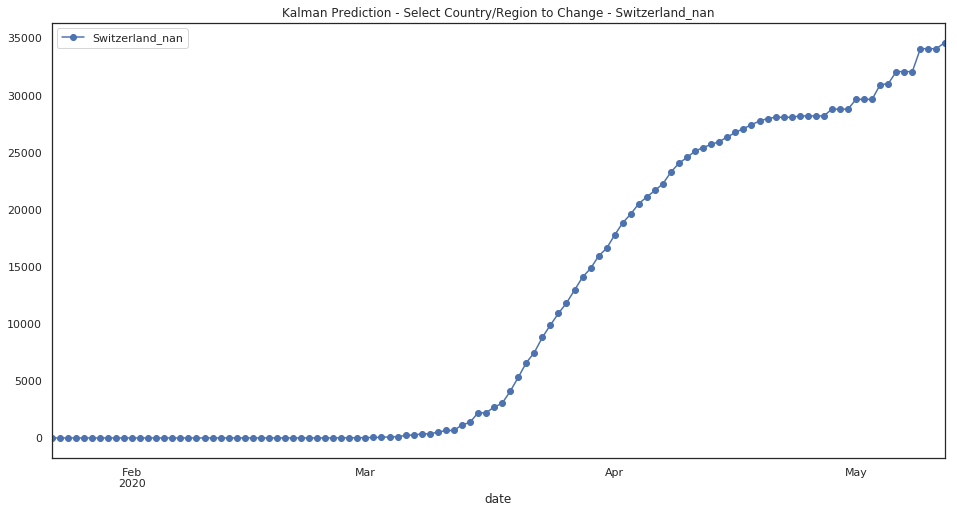

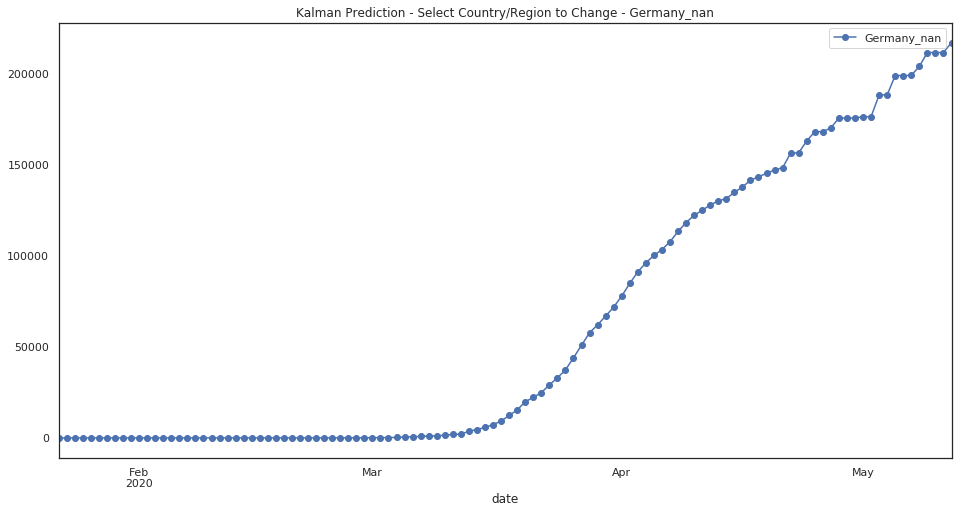

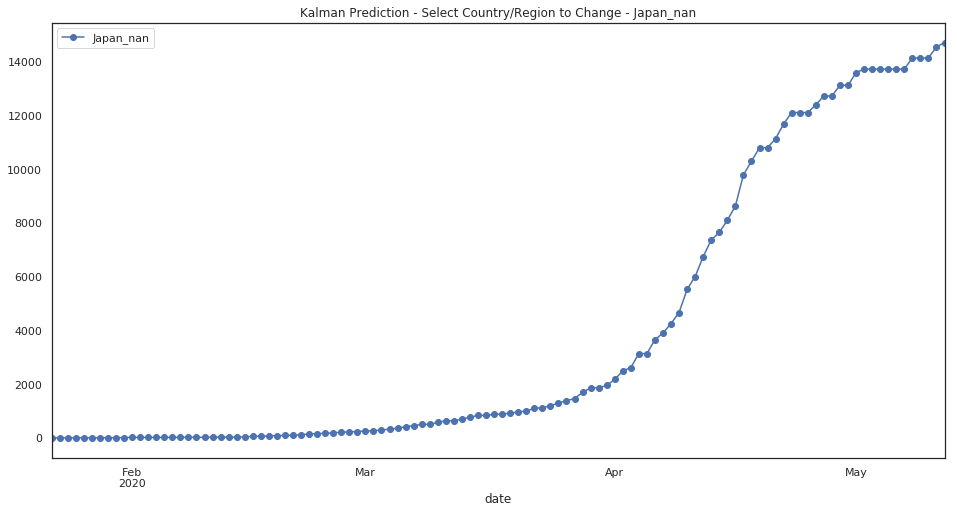

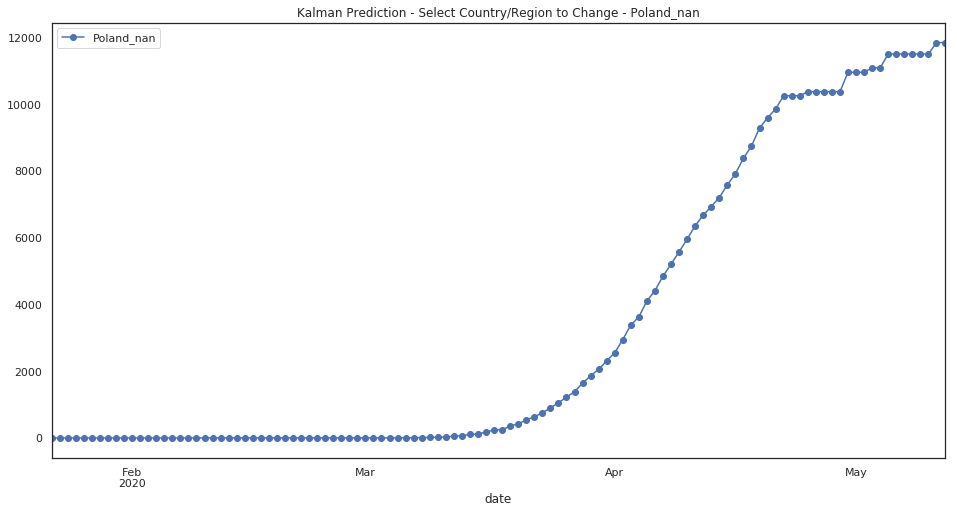

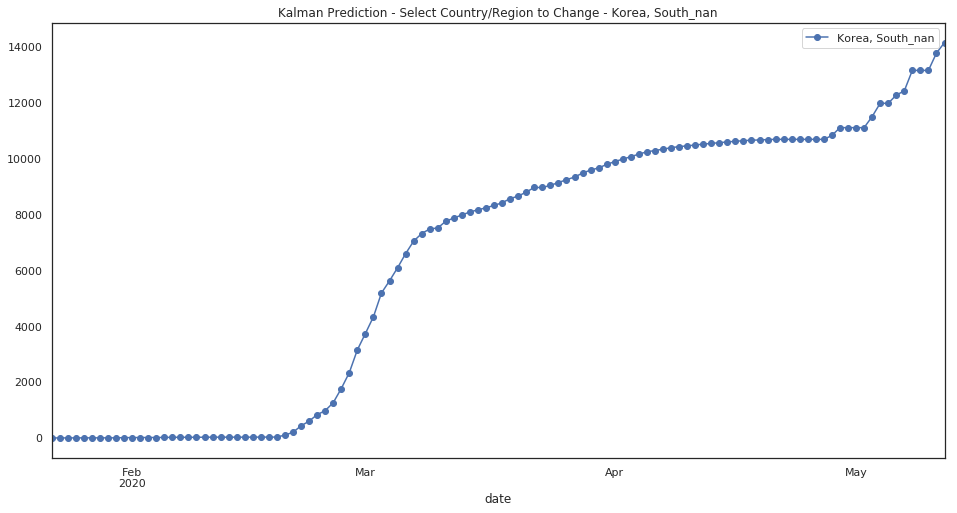

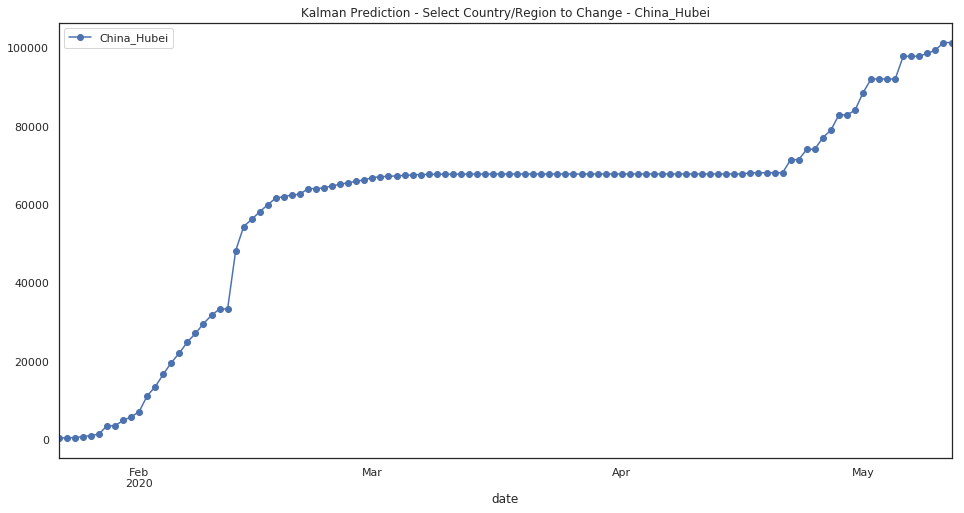

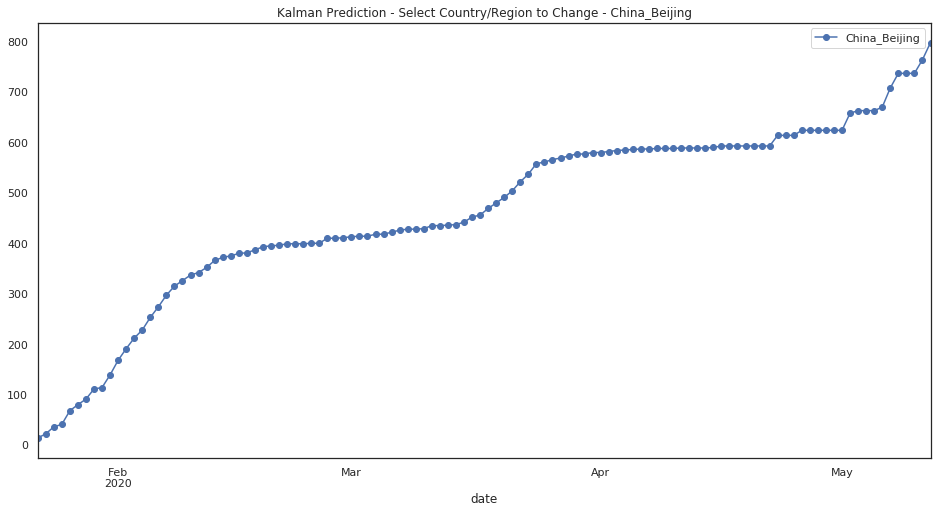

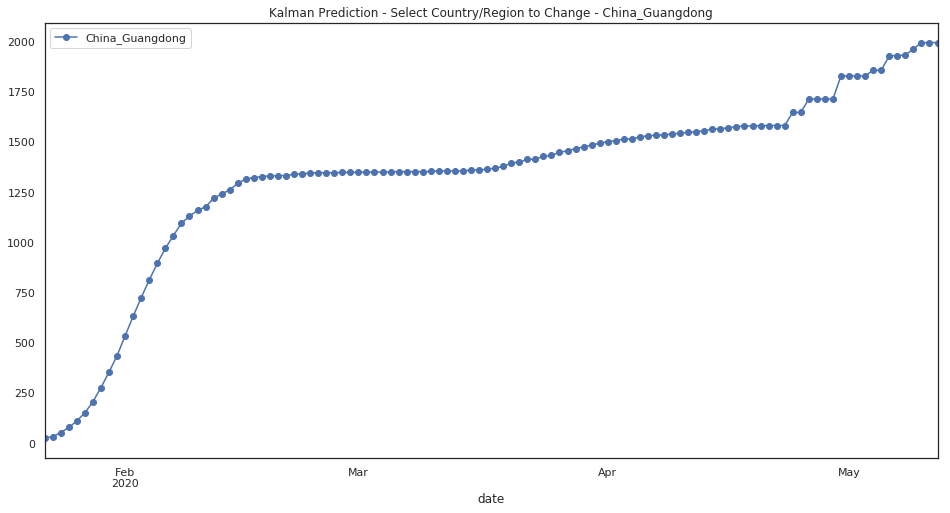

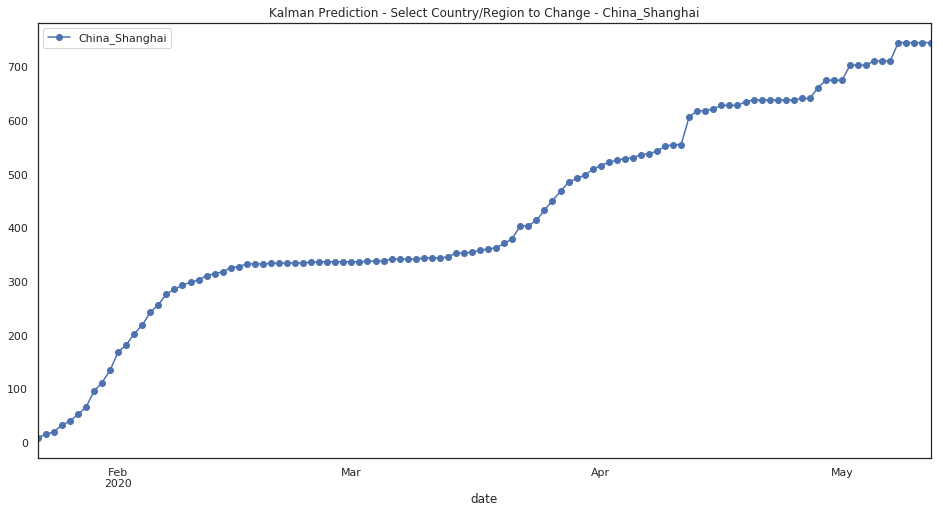

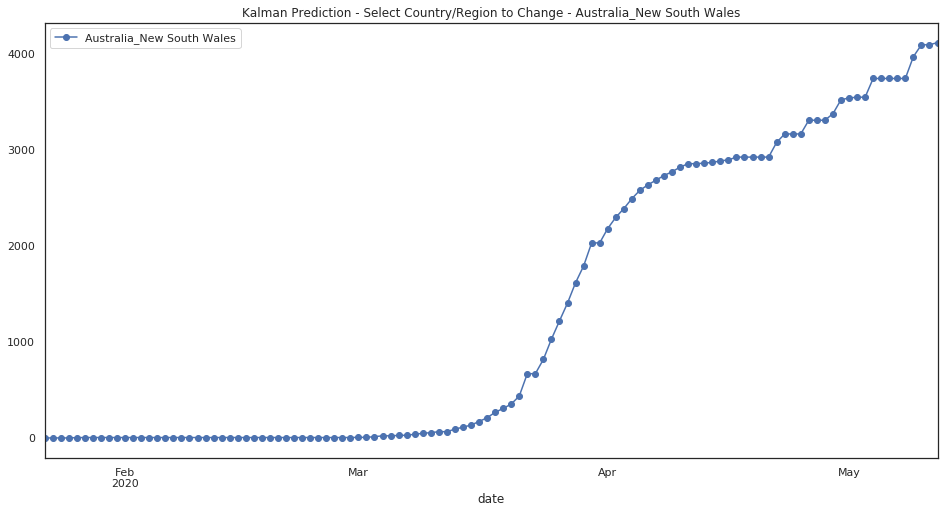

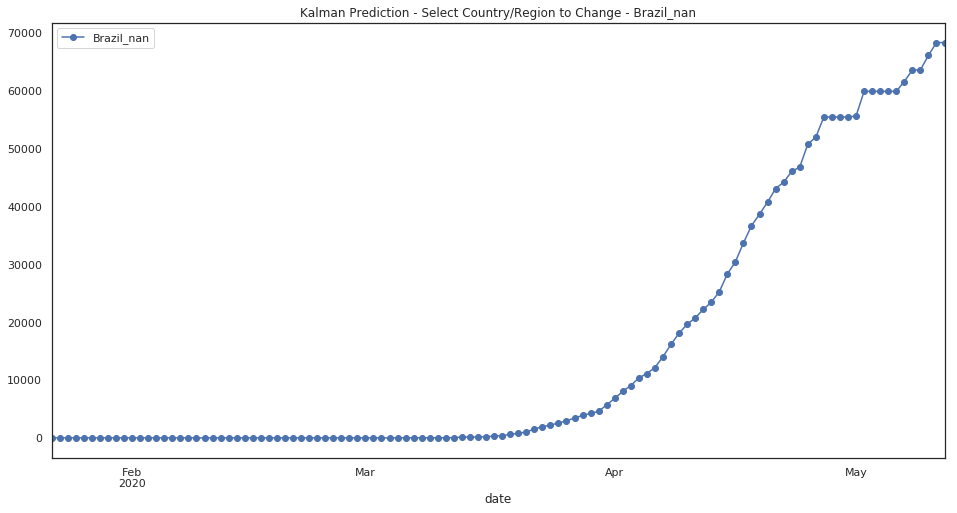

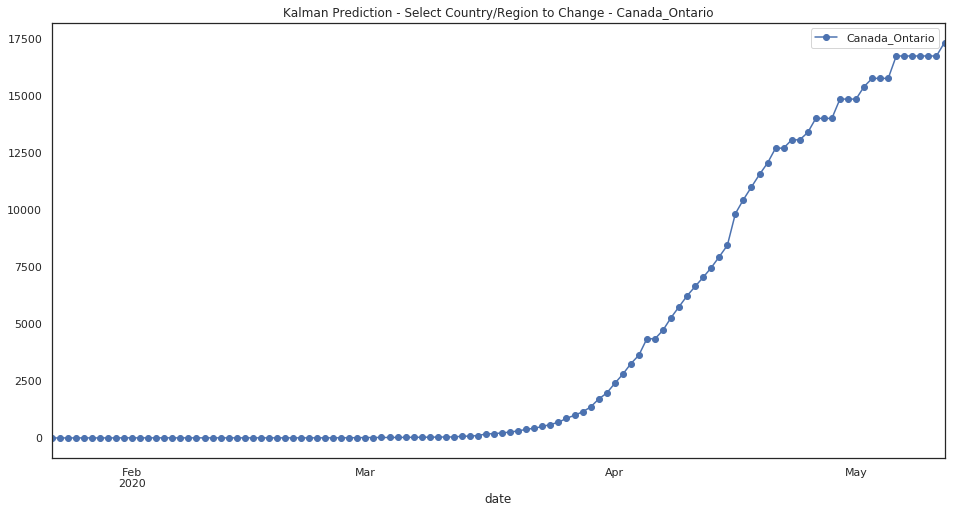

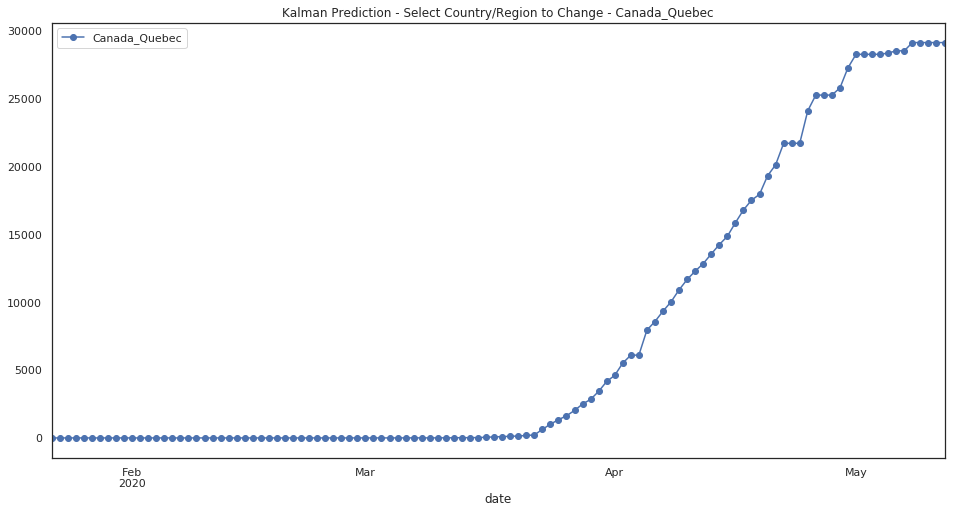

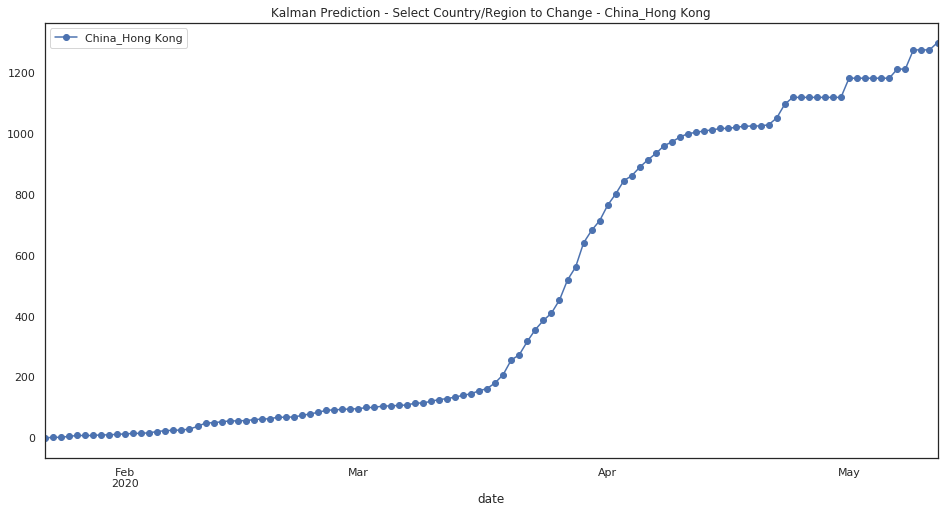

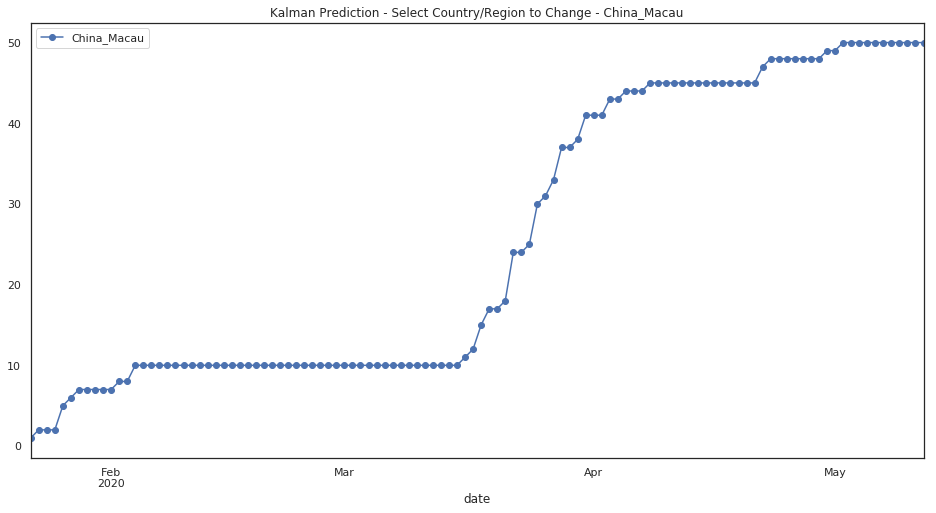

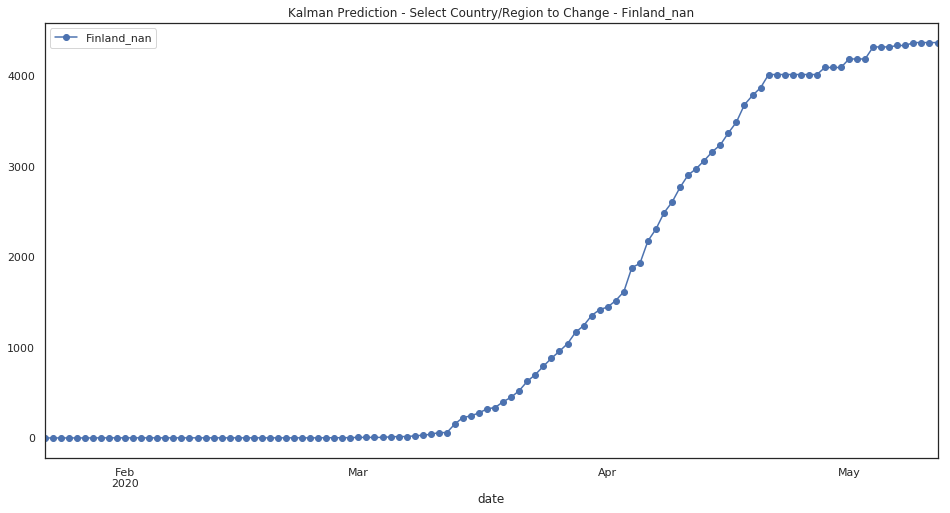

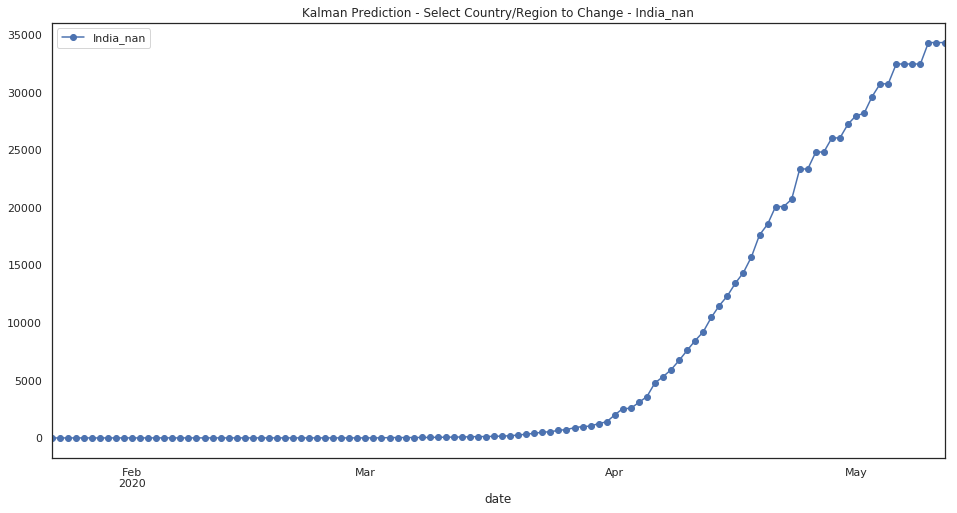

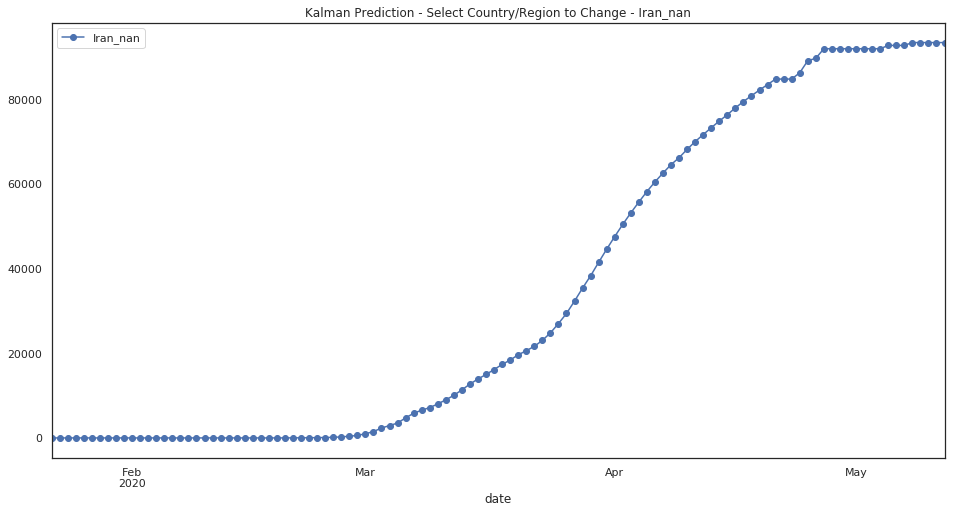

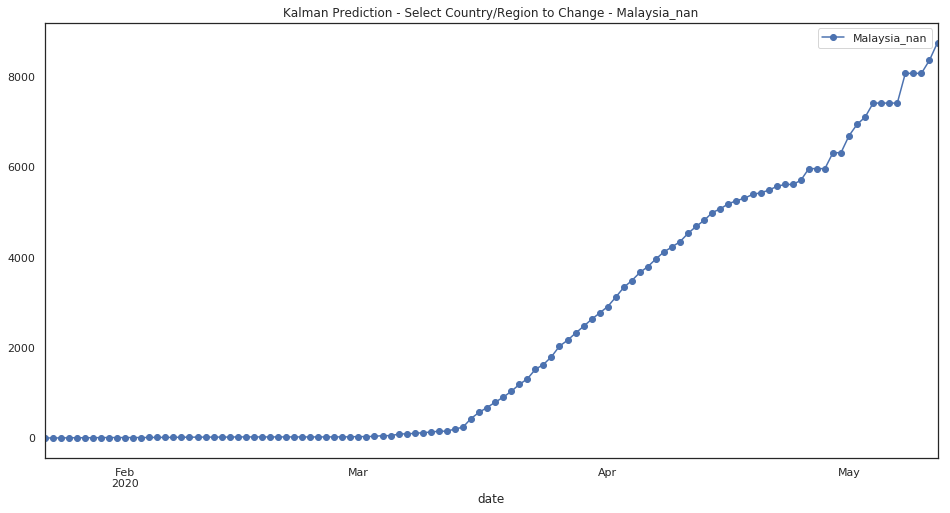

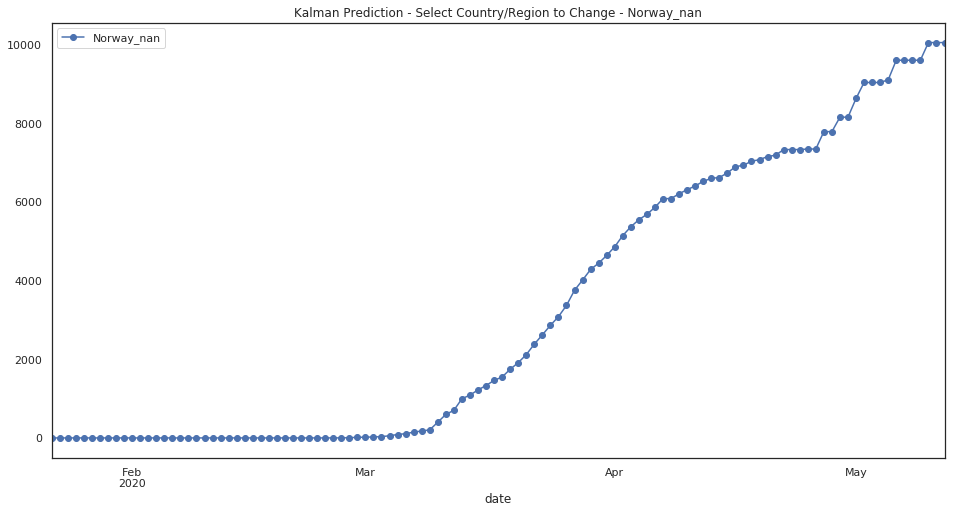

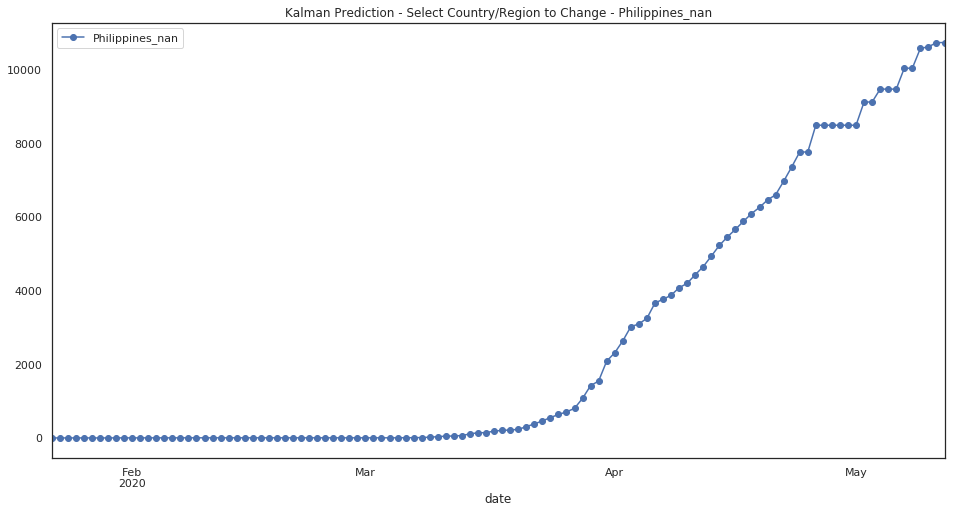

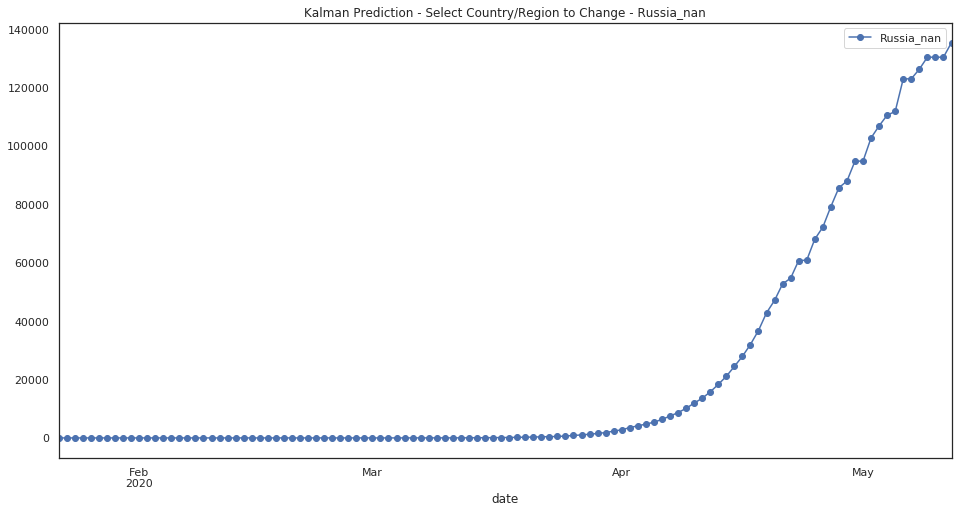

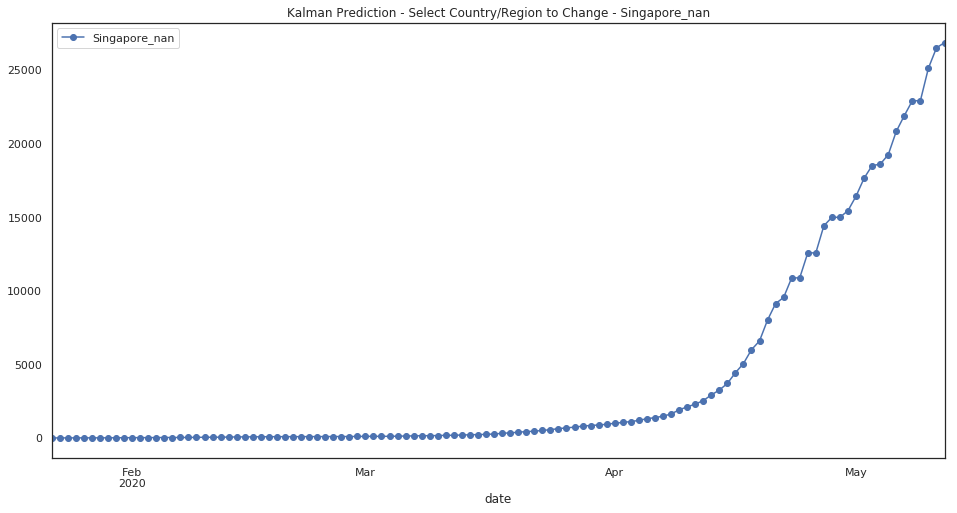

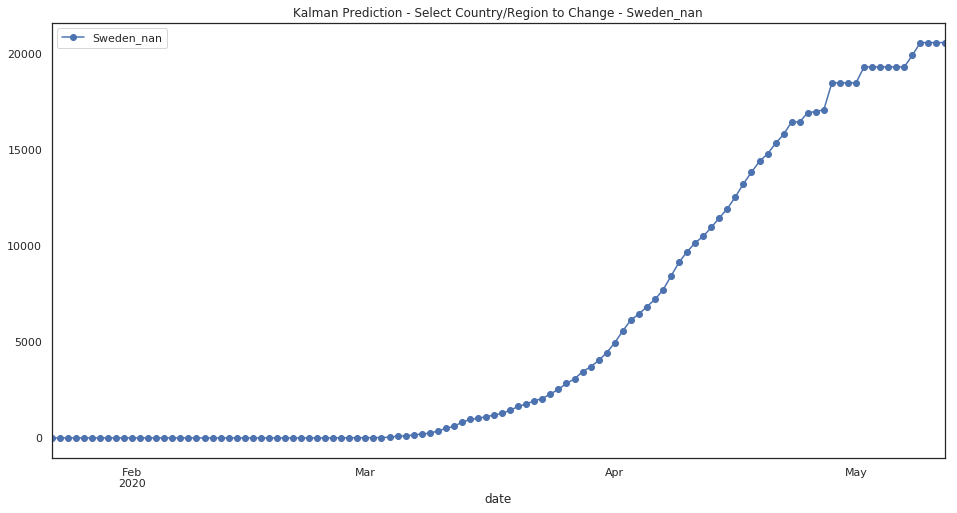

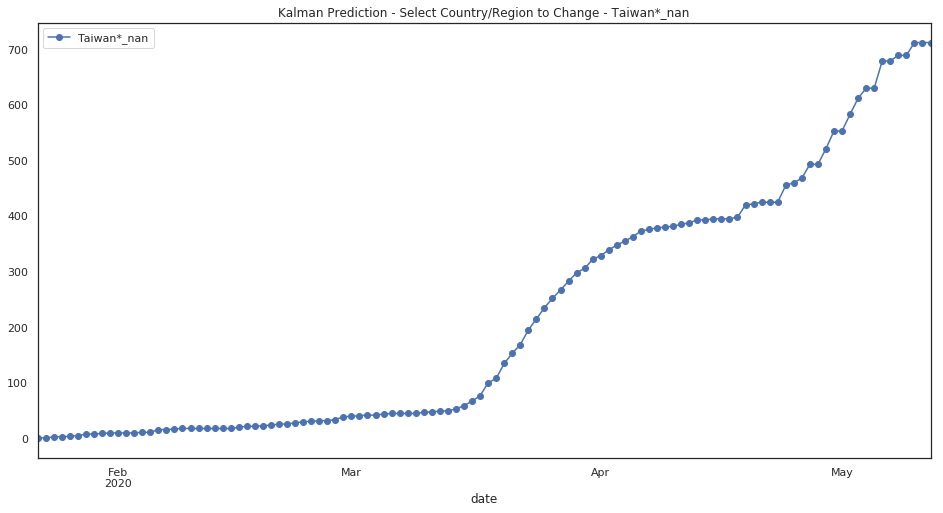

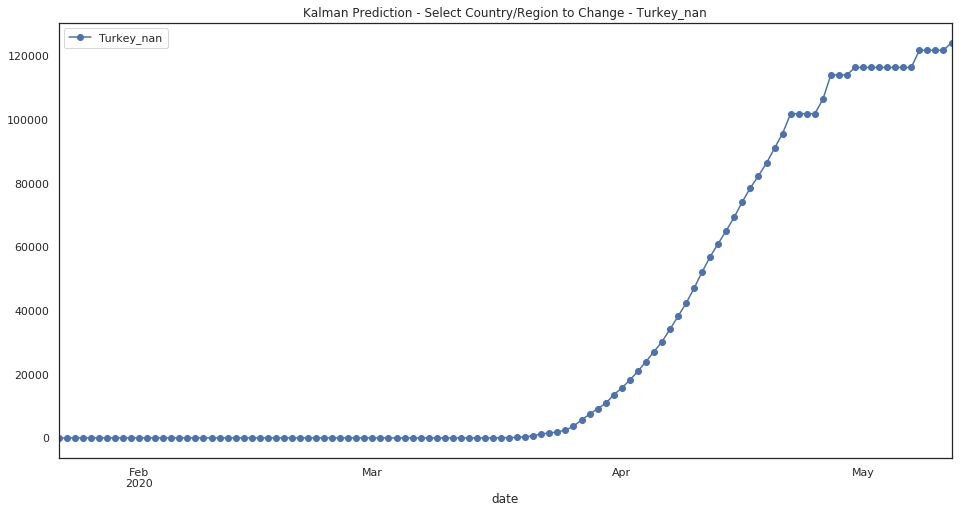

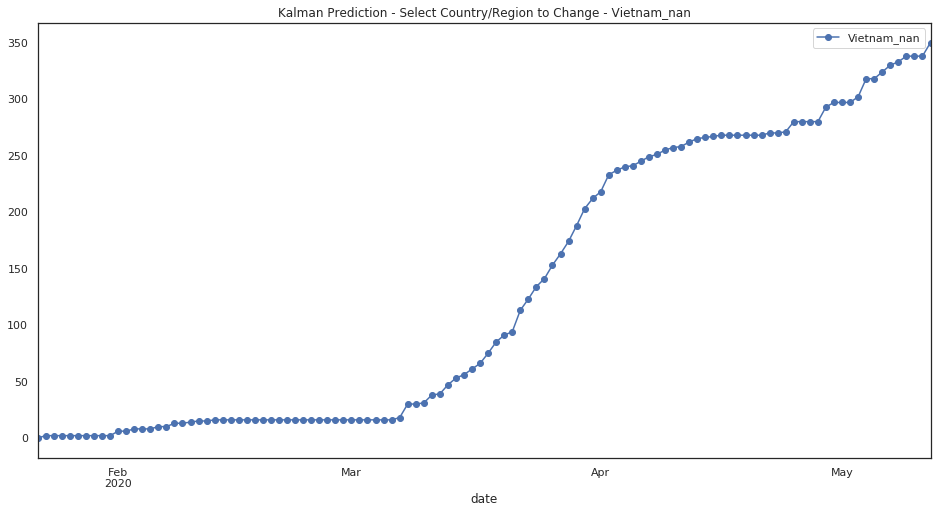

In [59]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [60]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-05-12 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN        959539.0
Spain_nan                                     NaN        312752.0
United Kingdom_nan                            NaN        262969.0
France_nan                                    NaN        238553.0
Italy_nan                                     NaN        224917.0
Germany_nan                                   NaN        216967.0
Russia_nan                                    NaN        135467.0
Turkey_nan                                    NaN        124142.0
China_Hubei                                   NaN        101352.0
Iran_nan                                      NaN         93424.0
Brazil_nan                                    NaN         68308.0
Netherlands_nan                               NaN         59287.0
Belgium_nan                                   NaN         46046.0
Switzerland_nan                               NaN         34599.0
India_nan                                     NaN         34314.0
Portugal_nan                                  NaN         32078.0
Canada_Quebec                                 NaN         29138.0
Peru_nan                                      NaN         28239.0
Ireland_nan                                   NaN         27778.0
Singapore_nan                                 NaN         26861.0
Chile_nan                                     NaN         20783.0
Sweden_nan                                    NaN         20564.0
Ecuador_nan                                   NaN         19750.0
Mexico_nan                                    NaN         19392.0
Israel_nan                                    NaN         19281.0
Saudi Arabia_nan                              NaN         17751.0
Canada_Ontario                                NaN         17346.0
Austria_nan                                   NaN         17089.0
Japan_nan                                     NaN         14708.0
Pakistan_nan                                  NaN         14291.0
...                                           ...             ...
Saint Lucia_nan                               NaN            17.0
Grenada_nan                                   NaN            15.0
Saint Vincent and the Grenadines_nan          NaN            15.0
Holy See_nan                                  NaN            15.0
United Kingdom_Falkland Islands (Malvinas)    NaN            14.0
Central African Republic_nan                  NaN            14.0
Gambia_nan                                    NaN            12.0
Seychelles_nan                                NaN            12.0
Denmark_Greenland                             NaN            11.0
United Kingdom_Turks and Caicos Islands       NaN            11.0
United Kingdom_Montserrat                     NaN            11.0
Nicaragua_nan                                 NaN            10.0
Suriname_nan                                  NaN            10.0
MS Zaandam_nan                                NaN             9.0
Mauritania_nan                                NaN             7.0
Western Sahara_nan                            NaN             6.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN             6.0
Bhutan_nan                                    NaN             6.0
United Kingdom_British Virgin Islands         NaN             6.0
France_Saint Barthelemy                       NaN             6.0
Canada_Northwest Territories                  NaN             5.0
Burundi_nan                                   NaN             5.0
South Sudan_nan                               NaN             4.0
Sao Tome and Principe_nan                     NaN             4.0
United Kingdom_Anguilla                       NaN             3.0
France_Saint Pierre and Miquelon              NaN             1.0
Yemen_nan                                     NaN             1.0
China_Tibet                                   NaN             1.0
Canada_Recovered                              NaN             0.0
Canada_Diamond Princes

In [61]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [62]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [63]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [64]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [65]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [66]:
pred[:-1]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-01-22            -70.0       -902.0        -60.0     -33740.0   
2020-01-23              0.0          0.0          0.0          0.0   
2020-01-24              0.0          0.0          0.0          0.0   
2020-01-25              0.0          0.0          0.0          0.0   
2020-01-26              0.0          0.0          0.0          0.0   
2020-01-27              0.0          0.0          0.0          0.0   
2020-01-28              0.0          0.0          0.0          0.0   
2020-01-29              0.0          0.0          0.0          0.0   
2020-01-30              0.0          0.0          0.0          0.0   
2020-01-31              0.0          0.0          0.0          0.0   
2020-02-01              0.0          0.0          0.0          0.0   
2020-02-02              0.0          0.0          0.0          0.0   
2020-02-03              0.0          0.0          0.0          0.0   
2020-02-04              0.0          0.0          0.0          0.0   
2020-02-05              0.0          0.0          0.0          0.0   
2020-02-06              0.0          0.0          0.0          0.0   
2020-02-07              0.0          0.0          0.0          0.0   
2020-02-08              0.0          0.0          0.0          0.0   
2020-02-09              0.0          0.0          0.0          0.0   
2020-02-10              0.0          0.0          0.0          0.0   
2020-02-11              0.0          0.0          0.0          0.0   
2020-02-12              0.0          0.0          0.0          0.0   
2020-02-13              0.0          0.0          0.0          0.0   
2020-02-14              0.0          0.0          0.0          0.0   
2020-02-15              0.0          0.0          0.0          0.0   
2020-02-16              0.0          0.0          0.0          0.0   
2020-02-17              0.0          0.0          0.0          0.0   
2020-02-18              0.0          0.0          0.0          0.0   
2020-02-19              0.0          0.0          0.0          0.0   
2020-02-20              0.0          0.0          0.0          0.0   
...                     ...          ...          ...          ...   
2020-04-13            607.0        446.0       1914.0        638.0   
2020-04-14            665.0        467.0       1983.0        646.0   
2020-04-15            714.0        475.0       2070.0        659.0   
2020-04-16            784.0        494.0       2160.0        673.0   
2020-04-17            840.0        518.0       2268.0        673.0   
2020-04-18            906.0        539.0       2418.0        696.0   
2020-04-19            933.0        548.0       2534.0        704.0   
2020-04-20            996.0        562.0       2629.0        713.0   
2020-04-21           1026.0        584.0       2718.0        717.0   
2020-04-22           1092.0        609.0       2811.0        717.0   
2020-04-23           1180.0        609.0       2811.0        717.0   
2020-04-24           1240.0        651.0       2811.0        752.0   
2020-04-25           1289.0        675.0       2950.0        778.0   
2020-04-26           1328.0        675.0       2950.0        778.0   
2020-04-27           1455.0        675.0       3147.0        778.0   
2020-04-28           1457.0        675.0       3147.0        778.0   
2020-04-29           1492.0        675.0       3382.0        830.0   
2020-04-30           1511.0        679.0       3382.0        830.0   
2020-05-01           1511.0        679.0       3382.0        830.0   
2020-05-02           1606.0        683.0       3514.0        830.0   
2020-05-03           1665.0        683.0       3514.0        836.0   
2020-05-04           1665.0        683.0       3610.0        836.0   
2020-05-05           1665.0        683.0       3628.0        836.0   
2020-05-06           1665.0        683.0       3628.0        836.0   
2020-05-07

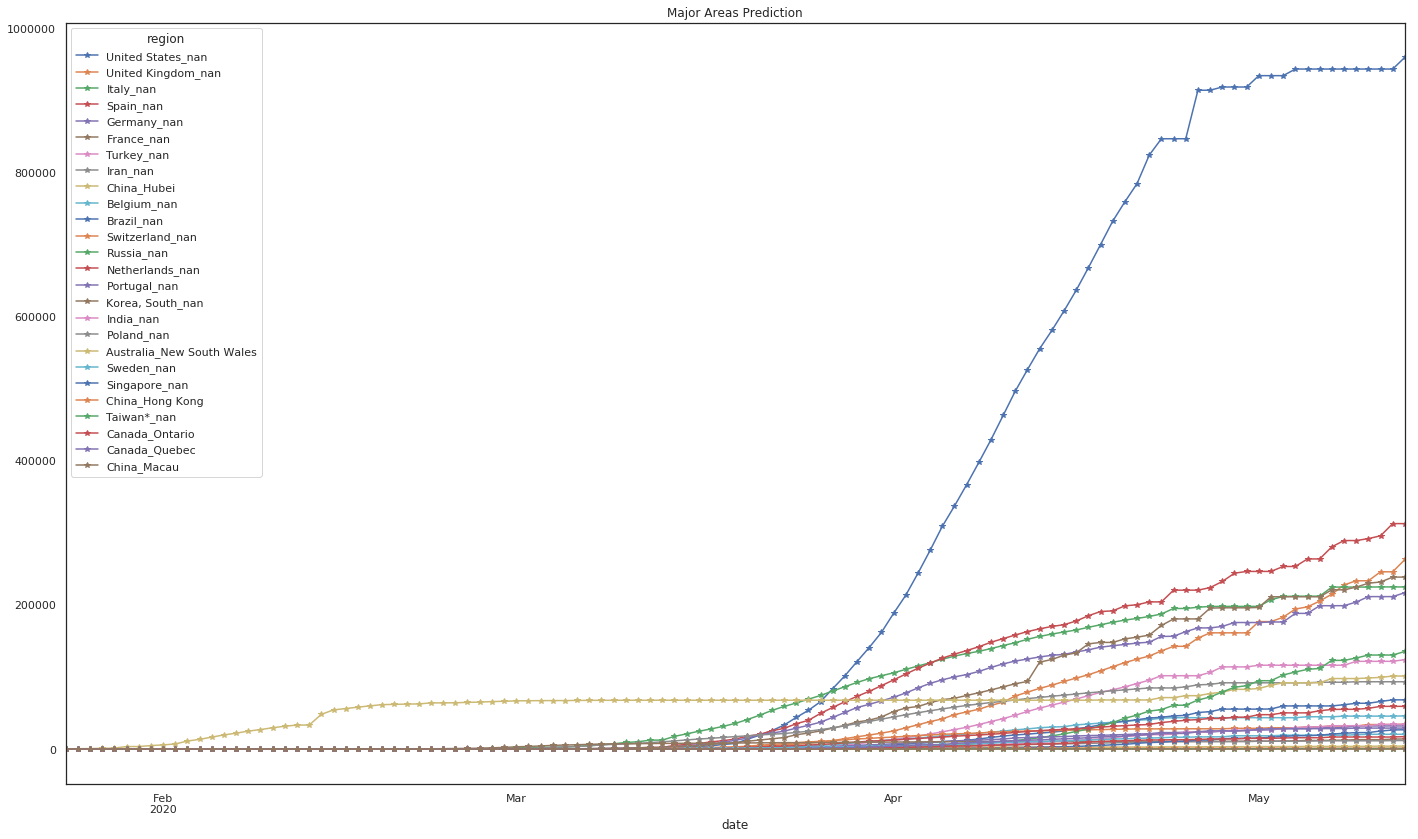

In [67]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Canada_Ontario',
        'Canada_Quebec',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

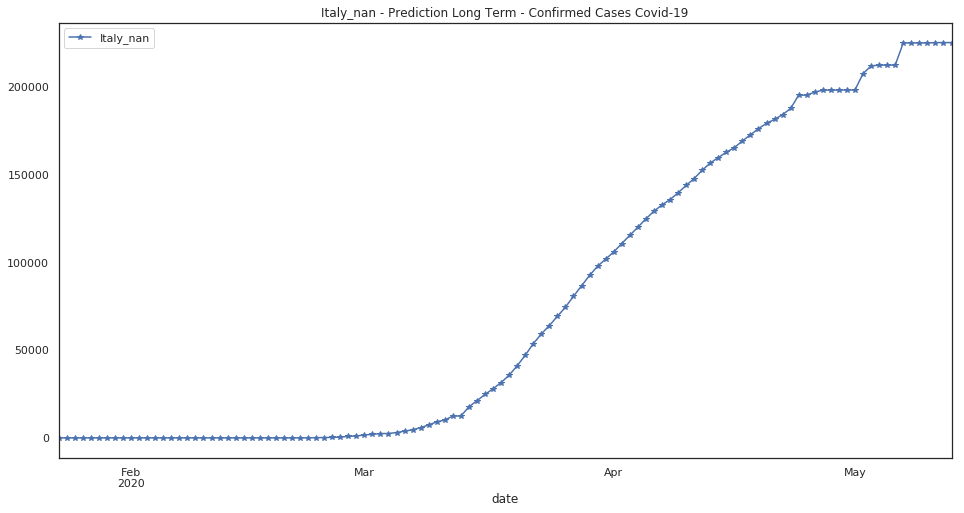

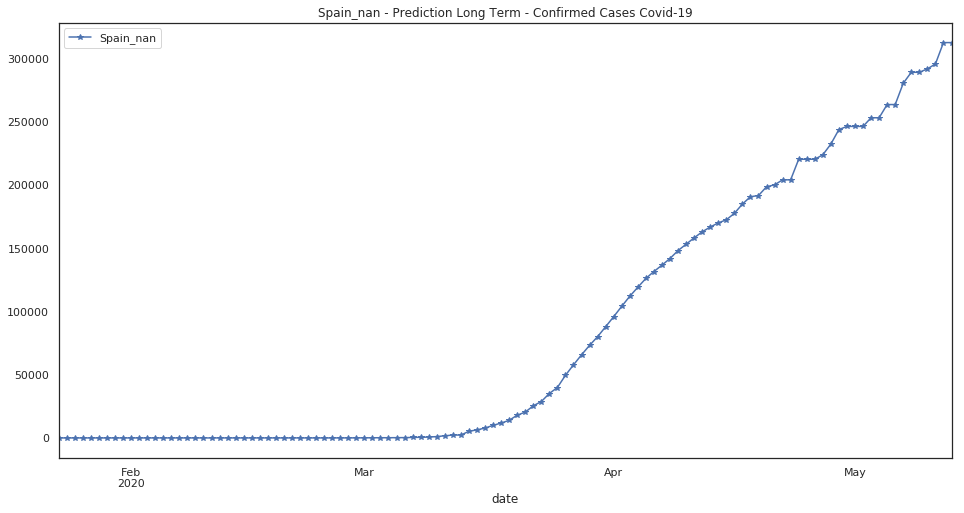

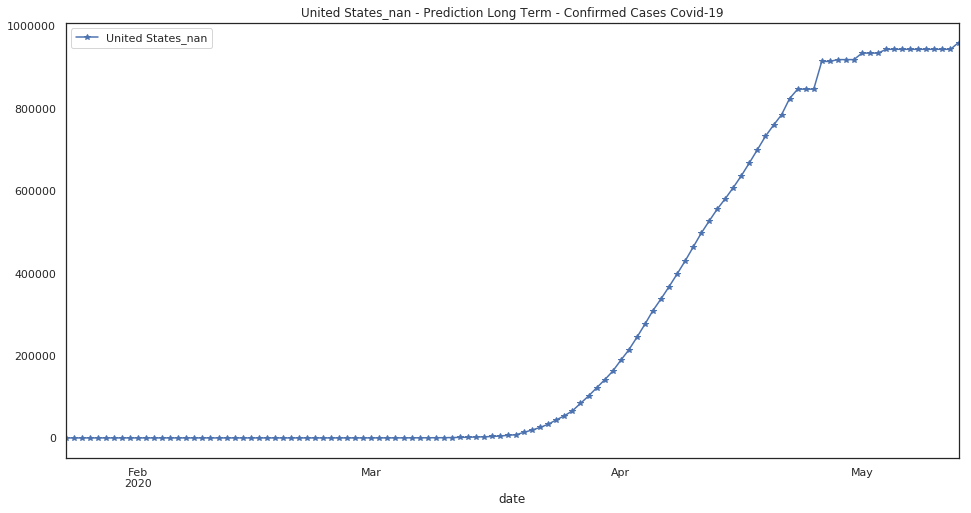

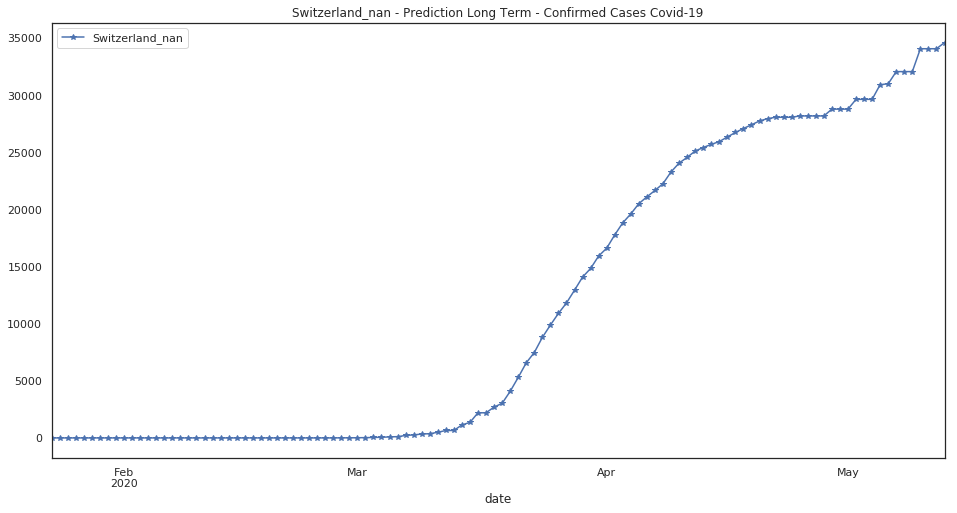

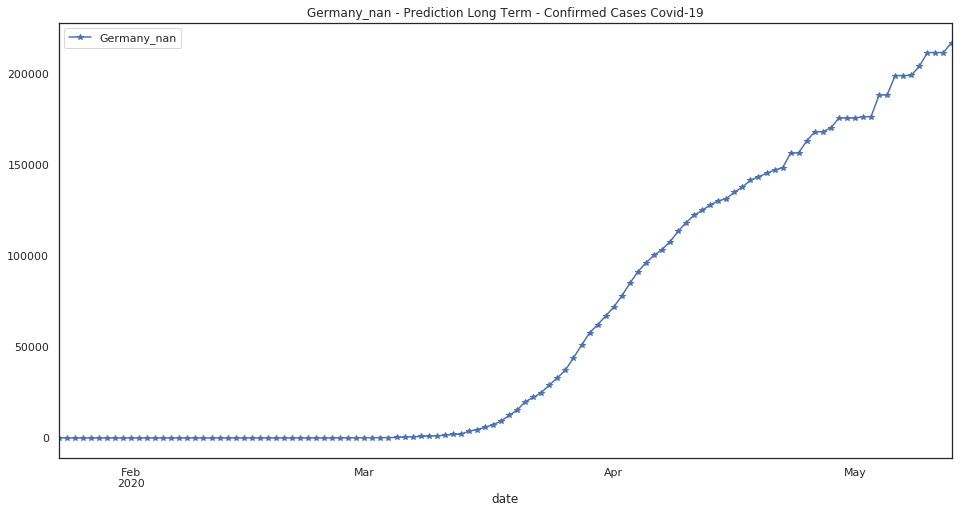

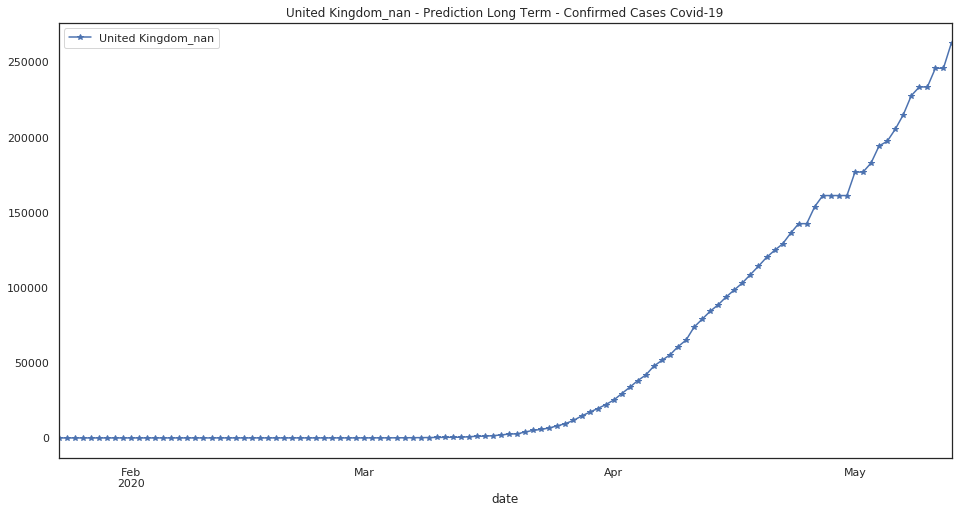

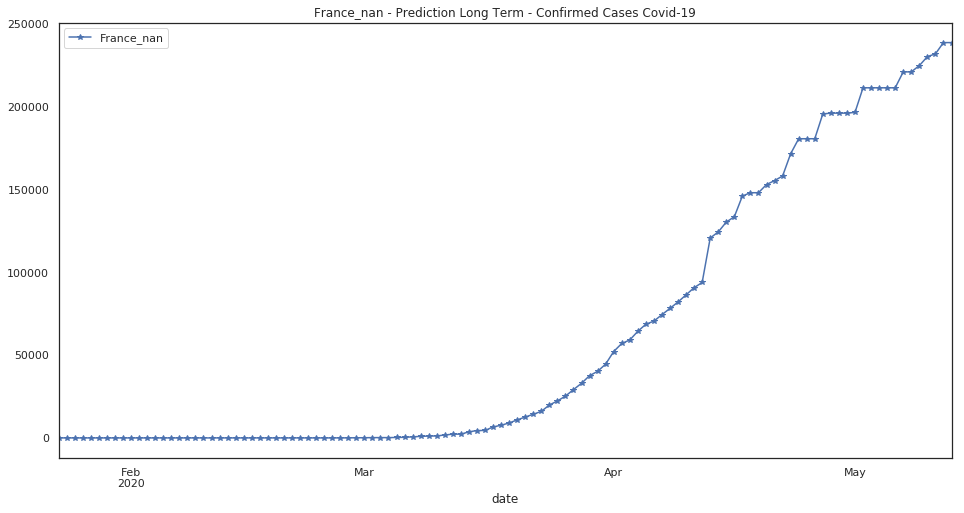

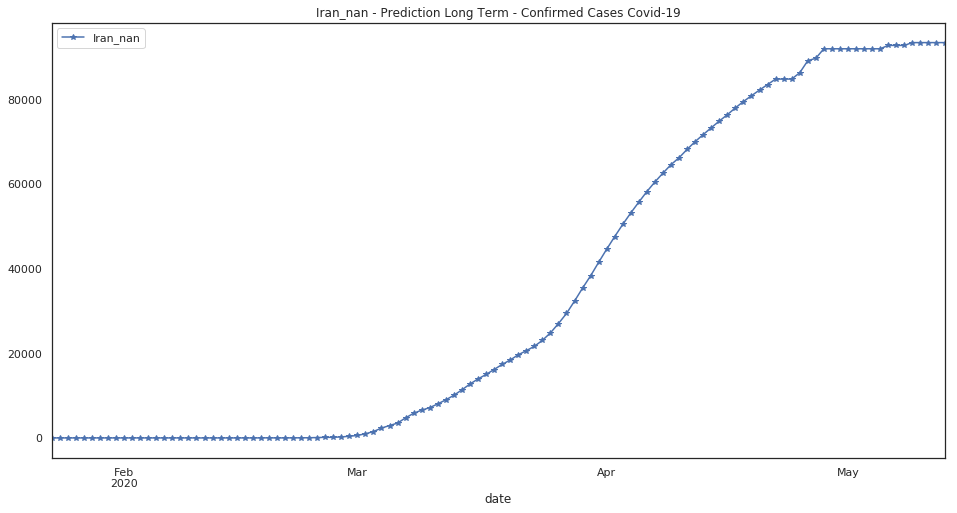

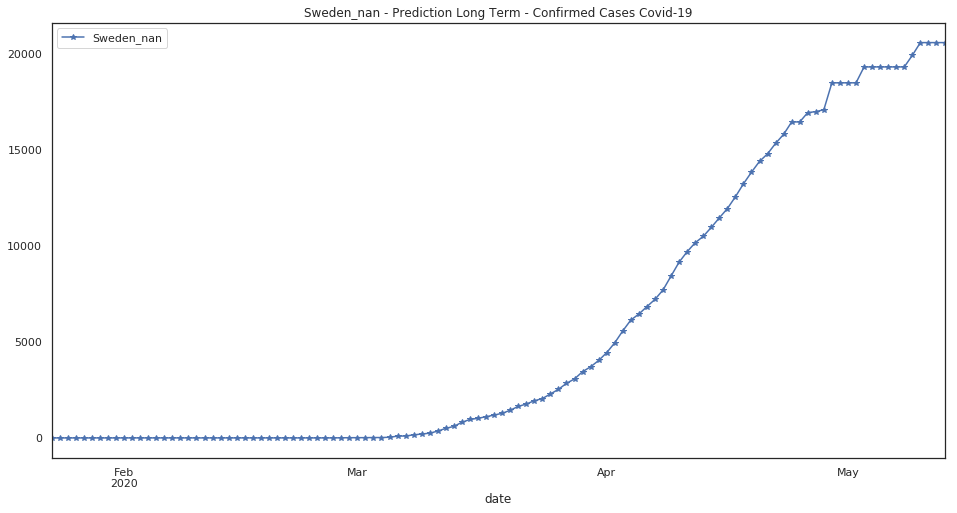

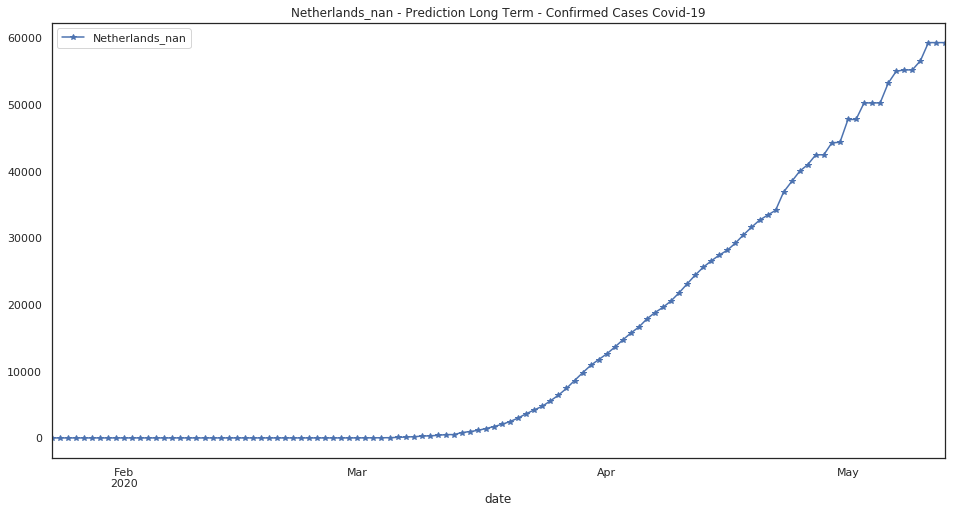

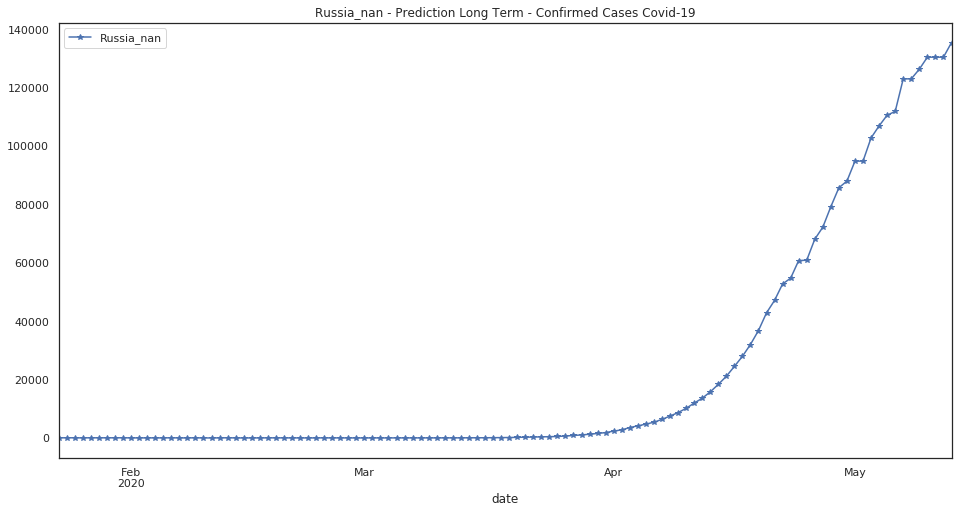

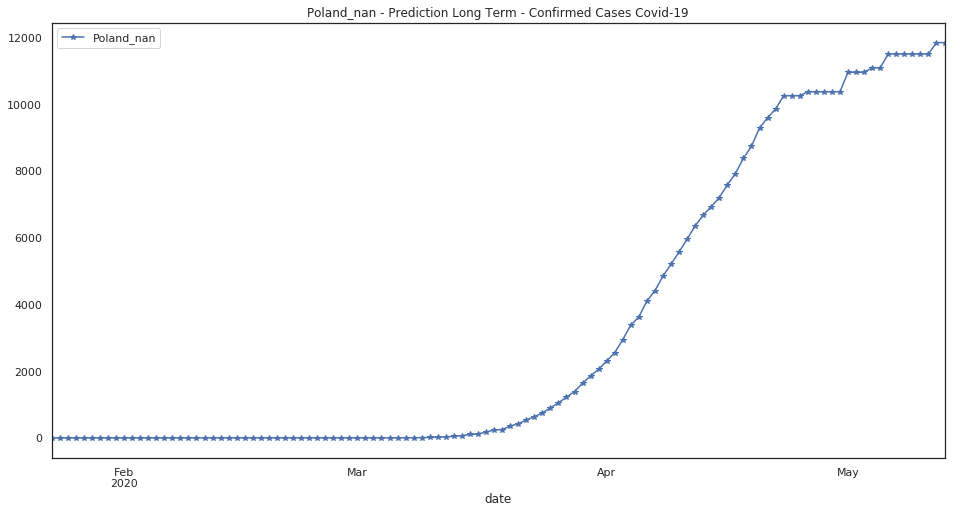

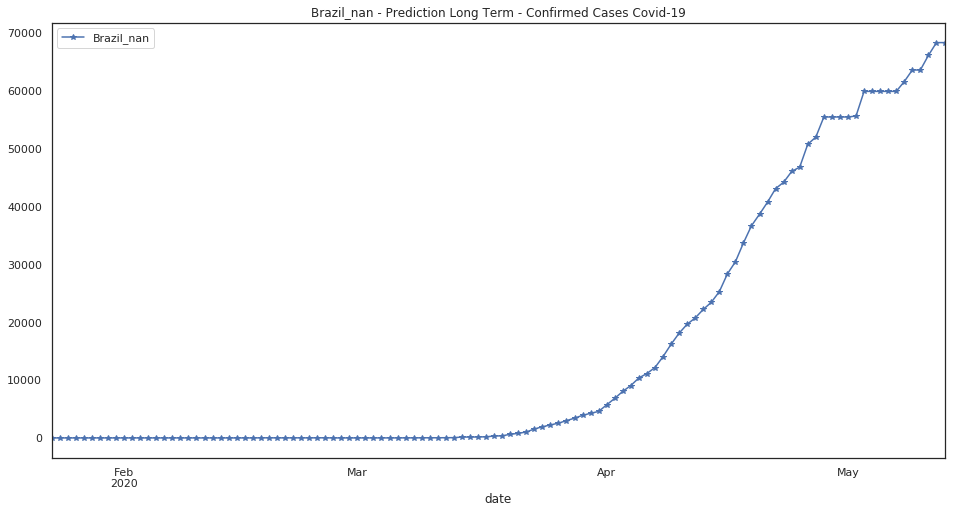

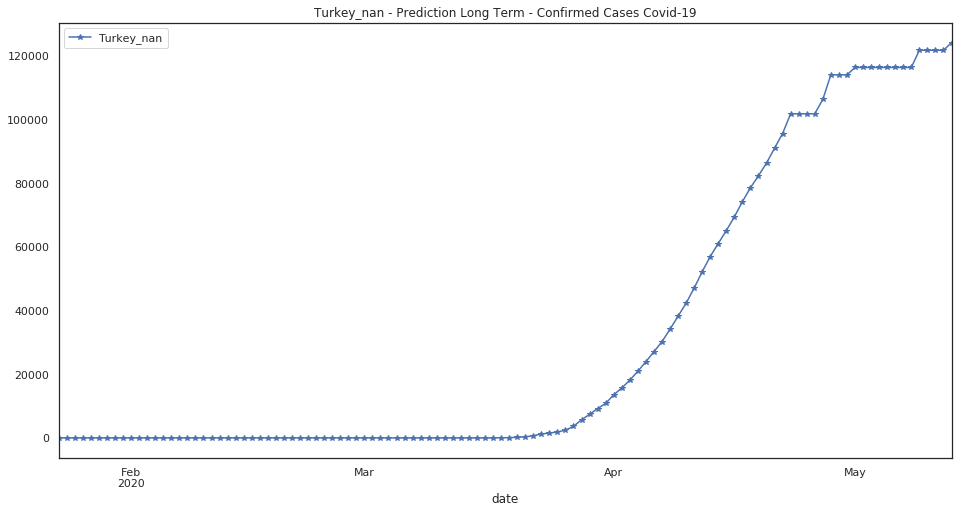

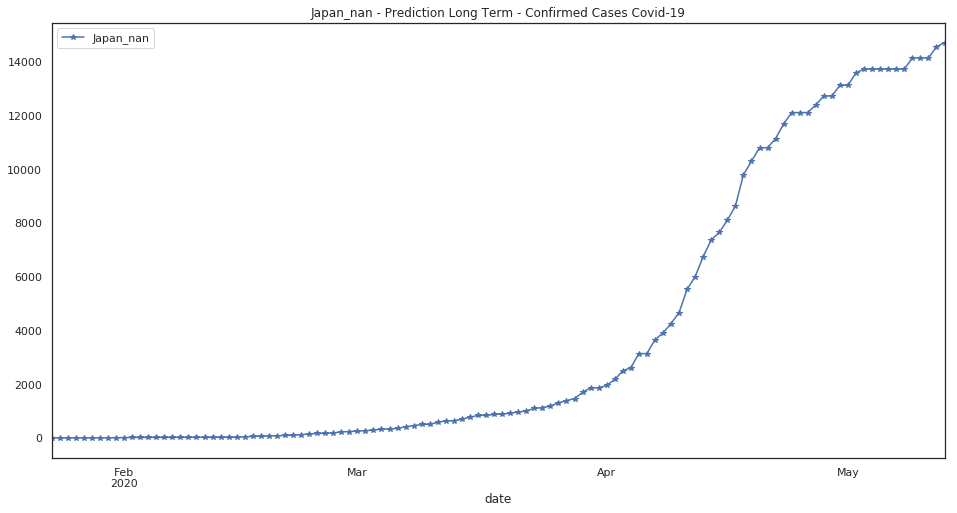

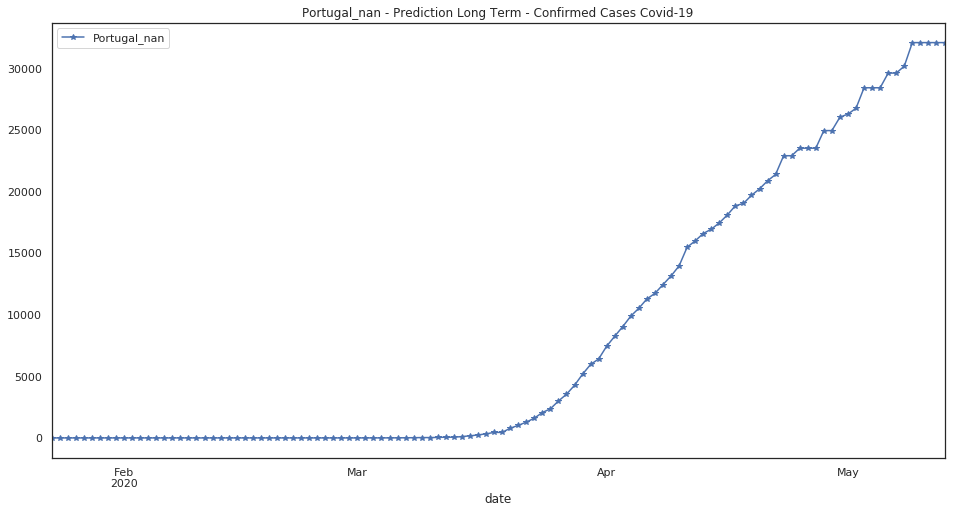

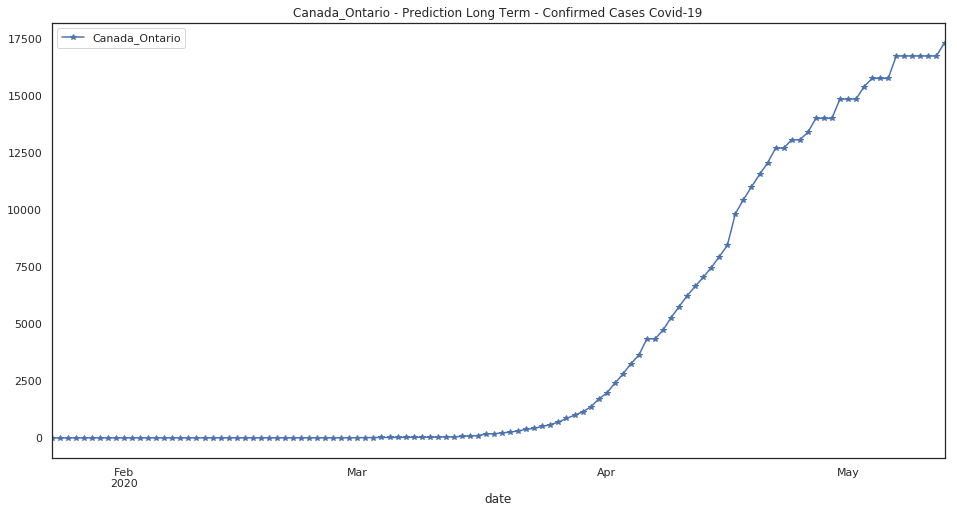

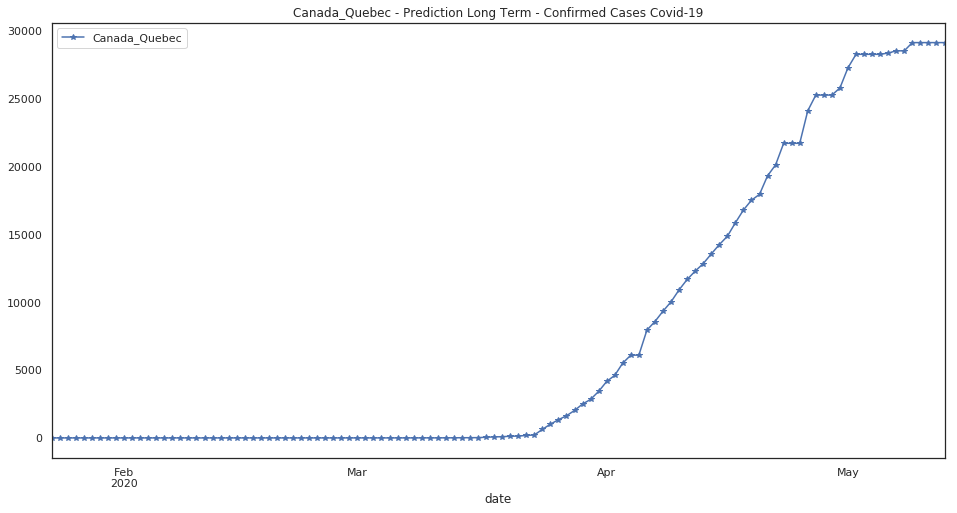

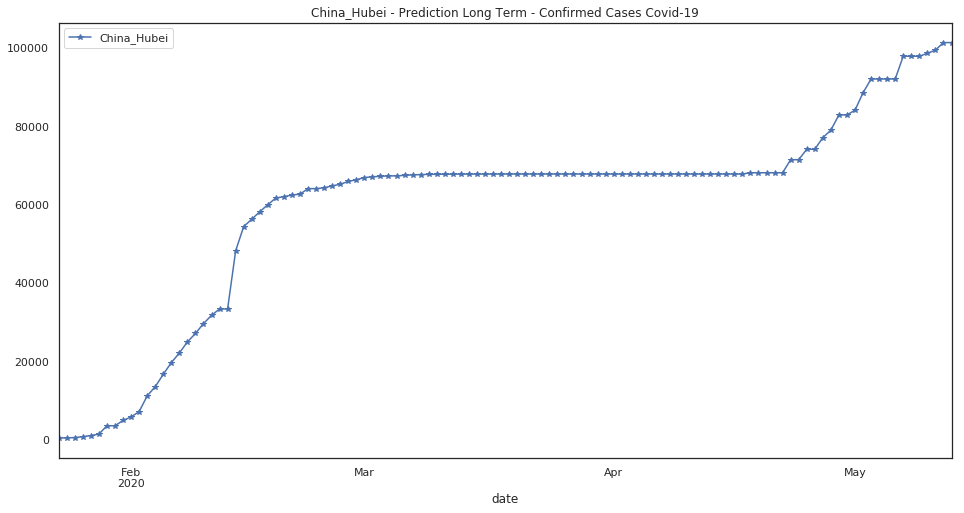

In [68]:
#
rgsx=['Italy_nan','Spain_nan','United States_nan','Switzerland_nan',
      'Germany_nan','United Kingdom_nan','France_nan','Iran_nan',
      'Sweden_nan','Netherlands_nan','Russia_nan','Poland_nan',
      'Brazil_nan','Turkey_nan','Japan_nan',
      'Portugal_nan','Canada_Ontario','Canada_Quebec','China_Hubei']
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[1:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

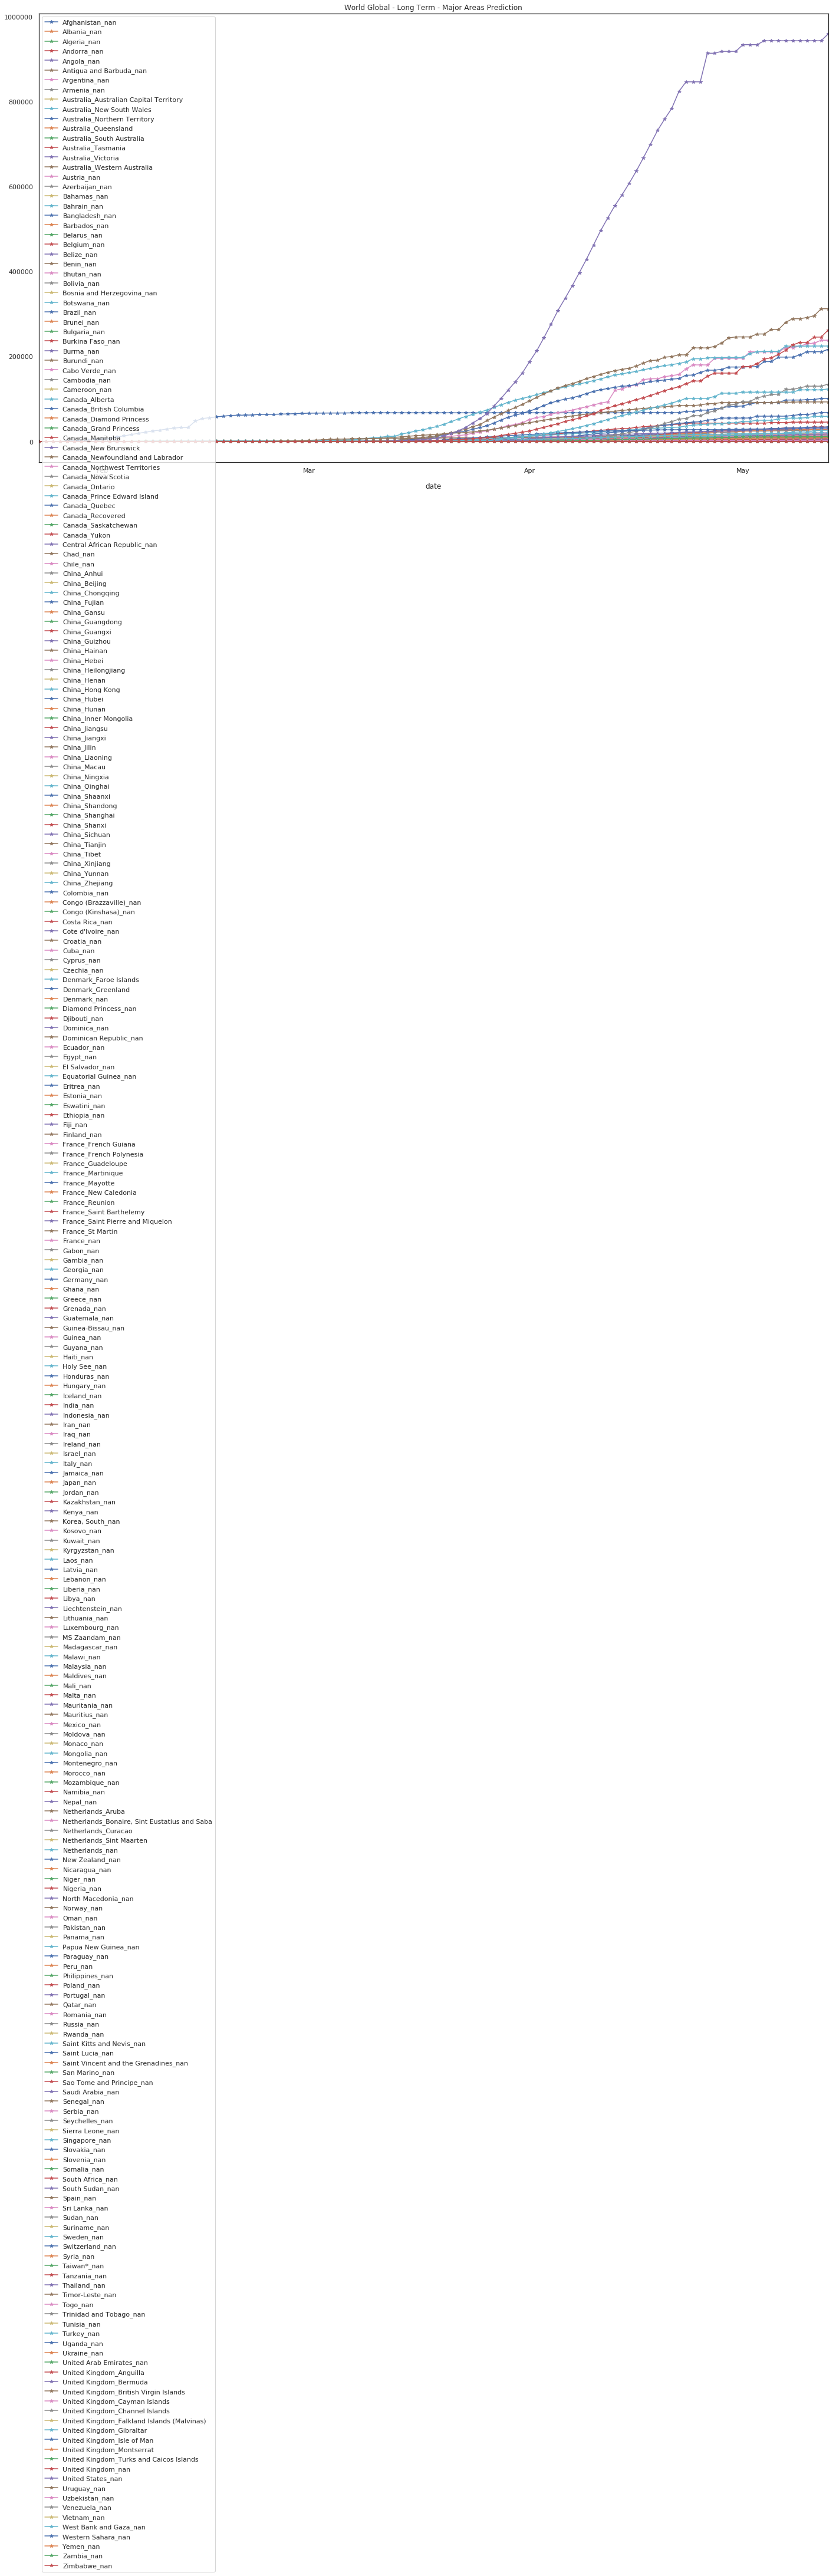

In [69]:
#region=my_train_list
pv2=pred
pv2[1:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [70]:
pv1=pv2[1:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [71]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-08              1.0          0.0         17.0          1.0   
2020-03-09              4.0          0.0         19.0          1.0   
2020-03-10              4.0          2.0         20.0          1.0   
2020-03-11              5.0         10.0         20.0          1.0   
2020-03-12              7.0         12.0         20.0          1.0   
2020-03-13              7.0         23.0         24.0          1.0   
2020-03-14              7.0         33.0         26.0          1.0   
2020-03-15             11.0         38.0         37.0          1.0   
2020-03-16             16.0         42.0         48.0          1.0   
2020-03-17             21.0         51.0         54.0          2.0   
2020-03-18             22.0         55.0         60.0         39.0   
2020-03-19             22.0         59.0         74.0         39.0   
2020-03-20             22.0         64.0         87.0         53.0   
2020-03-21             24.0         70.0         90.0         75.0   
2020-03-22             24.0         76.0        139.0         88.0   
2020-03-23             40.0         89.0        201.0        113.0   
2020-03-24             40.0        104.0        230.0        133.0   
2020-03-25             74.0        123.0        264.0        164.0   
2020-03-26             84.0        146.0        302.0        188.0   
2020-03-27             94.0        174.0        367.0        224.0   
2020-03-28            110.0        186.0        409.0        267.0   
2020-03-29            110.0        197.0        454.0        308.0   
2020-03-30            120.0        212.0        511.0        334.0   
2020-03-31            170.0        223.0        584.0        370.0   
2020-04-01            174.0        243.0        716.0        376.0   
2020-04-02            237.0        259.0        847.0        390.0   
2020-04-03            273.0        277.0        986.0        428.0   
2020-04-04            281.0        304.0       1171.0        439.0   
2020-04-05            299.0        333.0       1251.0        466.0   
2020-04-06            349.0        361.0       1320.0        501.0   
...                     ...          ...          ...          ...   
2020-04-14            665.0        467.0       1983.0        646.0   
2020-04-15            714.0        475.0       2070.0        659.0   
2020-04-16            784.0        494.0       2160.0        673.0   
2020-04-17            840.0        518.0       2268.0        673.0   
2020-04-18            906.0        539.0       2418.0        696.0   
2020-04-19            933.0        548.0       2534.0        704.0   
2020-04-20            996.0        562.0       2629.0        713.0   
2020-04-21           1026.0        584.0       2718.0        717.0   
2020-04-22           1092.0        609.0       2811.0        717.0   
2020-04-23           1180.0        609.0       2811.0        717.0   
2020-04-24           1240.0        651.0       2811.0        752.0   
2020-04-25           1289.0        675.0       2950.0        778.0   
2020-04-26           1328.0        675.0       2950.0        778.0   
2020-04-27           1455.0        675.0       3147.0        778.0   
2020-04-28           1457.0        675.0       3147.0        778.0   
2020-04-29           1492.0        675.0       3382.0        830.0   
2020-04-30           1511.0        679.0       3382.0        830.0   
2020-05-01           1511.0        679.0       3382.0        830.0   
2020-05-02           1606.0        683.0       3514.0        830.0   
2020-05-03           1665.0        683.0       3514.0        836.0   
2020-05-04           1665.0        683.0       3610.0        836.0   
2020-05-05           1665.0        683.0       3628.0        836.0   
2020-05-06           1665.0        683.0       3628.0        836.0   
2020-05-07           1687.0        683.0       3628.0        836.0   
2020-05-08

In [72]:
p.to_csv('data/p+45_confirmed_daily.csv', index = False, header=True)

In [73]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region)].reset_index()

In [84]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
236                                Mozambique_nan -18.665695   35.529562   
237                                     Syria_nan  34.802075   38.996815   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  13.193900  -59.543200   
240                              Canada_Recovered   0.000000    0.000000   
241                                      Laos_nan  19.856270  102.495496   
242                                     Libya_nan  26.335100   17.228331   
243                        West Bank and Gaza_nan  31.952200   35.233200   
244                             Guinea-Bissau_nan  11.803700  -15.180400   
245                                      Mali_nan  17.570692   -3.996166   
246                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
247                  Canada_Northwest Territories  64.825500 -124.845700   
248                                  Canada_Yukon  64.282300 -135.000000   
249                                    Kosovo_nan  42.602636   20.902977   
250                                     Burma_nan  21.916200   95.956000   
251                       United Kingdom_Anguilla  18.220600  -63.068600   
252         United Kingdom_British Virgin Islands  18.420700  -64.640000   
253       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
254                                MS Zaandam_nan   0.000000    0.000000   
255                                  Botswana_nan -22.328500   24.684900   
256                                   Burundi_nan  -3.373100   29.918900   
257            

In [85]:
#!pip install folium
import folium 

lat=46.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat,lng,num,totpred in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]),sum(heatmap_m[heatmap_m.columns[3]] , heatmap_m[heatmap_m.columns[-1]] )):
    popup = folium.Popup( heatmap_m['region'][num]+' pred='+str(totpred)+' date='+date_pred , parse_html=True)
    use_color=heatmap_m['region'][num][0]
    #print('use_color=',use_color)
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
heatmap_m2

index                     region      Lat      Long  2020-01-23 00:00:00  \
0       9  Australia_New South Wales -33.8688  151.2093                  0.0   
1      23                Belgium_nan  50.8333    4.0000                  0.0   
2      28                 Brazil_nan -14.2350  -51.9253                  0.0   
3      42             Canada_Ontario  51.2538  -85.3232                  0.0   
4      44              Canada_Quebec  52.9399  -73.5491                  0.0   
5      61            China_Hong Kong  22.3000  114.2000                  0.0   
6      62                China_Hubei  30.9756  112.2707                455.0   
7      69                China_Macau  22.1667  113.5500                  1.0   
8     116                 France_nan  46.2276    2.2137                  2.0   
9     121                Germany_nan  51.0000    9.0000                  0.0   
10    132                  India_nan  21.0000   78.0000                 30.0   
11    134                   Iran_nan  32.0000   53.0000                  0.0   
12    138                  Italy_nan  43.0000   12.0000                  7.0   
13    144           Korea, South_nan  36.0000  128.0000                  1.0   
14    171            Netherlands_nan  52.1326    5.2913                  0.0   
15    185                 Poland_nan  51.9194   19.1451                  0.0   
16    186               Portugal_nan  39.3999   -8.2245                  0.0   
17    189                 Russia_nan  60.0000   90.0000                 28.0   
18    198              Singapore_nan   1.2833  103.8333                  0.0   
19    203                  Spain_nan  40.0000   -4.0000                  0.0   
20    207                 Sweden_nan  63.0000   16.0000                  0.0   
21    208            Switzerland_nan  46.8182    8.2275                  0.0   
22    209                Taiwan*_nan  23.7000  121.0000                  1.0   
23    215                 Turkey_nan  38.9637   35.2433                  0.0   
24    225         United Kingdom_nan  55.3781   -3.4360                  0.0   
25    227          United States_nan  37.0902  -95.7129                  1.0   

    2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
0                   0.0                  0.0                  0.0   
1                   0.0                  0.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  0.0                  0.0   
4                   0.0                  0.0                  0.0   
5                   2.0                  2.0                  5.0   
6                 444.0                549.0                761.0   
7                   2.0                  2.0                  2.0   
8                  27.0                  2.0                  3.0   
9                   4.0                  0.0                  0.0   
10                 40.0                 59.0                 52.0   
11                  0.0                  0.0                  0.0   
12                  0.0                  0.0                  0.0   
13                  1.0                  2.0                  2.0   
14                  0.0                  0.0                  0.0   
15                  0.0                  0.0                  0.0   
16                  0.0                  0.0                  0.0   
17                 56.0                 45.0                 14.0   
18                  1.0                  3.0                  3.0   
19                  0.0                  0.0                  0.0   
20                  0.0                  0.0                  0.0   
21                  0.0                  0.0                  0.0   
22                  1.0                  3.0                  3.0   
23                  0.0                  0.0                  0.0   
24                  0.0                  0.0                  0.0   
25                  1.0                  2.0     

In [88]:
import folium 

lat=46.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat2,lng2,num2,totpred2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]),sum(heatmap_m2[heatmap_m2.columns[3]] , heatmap_m2[heatmap_m2.columns[-1]] )):
    use_color2=heatmap_m2['region'][num2][0]
    popup2 = folium.Popup( heatmap_m2['region'][num2]+' pred='+str(totpred2)+' date='+date_pred , parse_html=True)  
    #print('use_color=',use_color)
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [89]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [90]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [91]:
exit()

H2O session _sid_9e15 closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
